# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [58]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
  from utils.training import run, evaluate
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
from utils.functions import Hardsigmoid

# Dataset:

In [4]:
batch_size_train = 10000
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 6
Number of testing examples: 10


# Training:

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [8]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_NonBinaryNet


ITERATION - loss: 0.26: 100%|█████████▉| 1680/1688 [00:20<00:00, 147.59it/s]

Training Results - Epoch: 1  Avg accuracy: 91.89 Avg loss: 0.32


ITERATION - loss: 0.19:   1%|          | 20/1688 [00:21<04:12,  6.60it/s]   

Validation Results - Epoch: 1  Avg accuracy: 92.23 Avg loss: 0.31


ITERATION - loss: 0.28: 1690it [00:41, 127.42it/s]

Training Results - Epoch: 2  Avg accuracy: 94.13 Avg loss: 0.22


ITERATION - loss: 0.23:   1%|          | 20/1688 [00:42<04:10,  6.66it/s]

Validation Results - Epoch: 2  Avg accuracy: 94.37 Avg loss: 0.22


ITERATION - loss: 0.13: 1690it [01:03, 147.82it/s]

Training Results - Epoch: 3  Avg accuracy: 95.11 Avg loss: 0.18


ITERATION - loss: 0.07:   1%|          | 20/1688 [01:04<04:09,  6.69it/s]

Validation Results - Epoch: 3  Avg accuracy: 95.28 Avg loss: 0.18


ITERATION - loss: 0.18: 1690it [01:24, 129.09it/s]

Training Results - Epoch: 4  Avg accuracy: 95.69 Avg loss: 0.16


ITERATION - loss: 0.21:   1%|          | 20/1688 [01:25<04:07,  6.74it/s]

Validation Results - Epoch: 4  Avg accuracy: 95.75 Avg loss: 0.16


ITERATION - loss: 0.32: 1690it [01:46, 140.66it/s]

Training Results - Epoch: 5  Avg accuracy: 96.10 Avg loss: 0.14


ITERATION - loss: 0.18:   1%|          | 20/1688 [01:47<04:07,  6.74it/s]

Validation Results - Epoch: 5  Avg accuracy: 96.12 Avg loss: 0.14


ITERATION - loss: 0.19: 100%|█████████▉| 1680/1688 [02:07<00:00, 144.36it/s]

Training Results - Epoch: 6  Avg accuracy: 96.51 Avg loss: 0.12


ITERATION - loss: 0.04:   1%|          | 20/1688 [02:08<04:08,  6.72it/s]   

Validation Results - Epoch: 6  Avg accuracy: 96.42 Avg loss: 0.13


ITERATION - loss: 0.18: 1690it [02:28, 143.30it/s]

Training Results - Epoch: 7  Avg accuracy: 96.81 Avg loss: 0.11


ITERATION - loss: 0.05:   1%|          | 20/1688 [02:29<04:18,  6.46it/s]

Validation Results - Epoch: 7  Avg accuracy: 96.75 Avg loss: 0.12


ITERATION - loss: 0.06: 1690it [02:50, 146.16it/s]

Training Results - Epoch: 8  Avg accuracy: 97.09 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 20/1688 [02:51<04:16,  6.51it/s]

Validation Results - Epoch: 8  Avg accuracy: 96.98 Avg loss: 0.11


ITERATION - loss: 0.08: 1690it [03:12, 145.59it/s]

Training Results - Epoch: 9  Avg accuracy: 97.25 Avg loss: 0.10


ITERATION - loss: 0.03:   1%|          | 20/1688 [03:13<04:08,  6.72it/s]

Validation Results - Epoch: 9  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.05: 1690it [03:33, 133.96it/s]

Training Results - Epoch: 10  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.02:   1%|          | 20/1688 [03:34<04:19,  6.43it/s]

Validation Results - Epoch: 10  Avg accuracy: 97.23 Avg loss: 0.10


ITERATION - loss: 0.07: 100%|█████████▉| 1680/1688 [03:55<00:00, 144.27it/s]

Training Results - Epoch: 11  Avg accuracy: 97.57 Avg loss: 0.09


ITERATION - loss: 0.09:   1%|          | 20/1688 [03:56<04:03,  6.86it/s]   

Validation Results - Epoch: 11  Avg accuracy: 97.32 Avg loss: 0.10


ITERATION - loss: 0.06: 1690it [04:16, 144.07it/s]

Training Results - Epoch: 12  Avg accuracy: 97.58 Avg loss: 0.09


ITERATION - loss: 0.04:   1%|          | 20/1688 [04:17<04:09,  6.68it/s]

Validation Results - Epoch: 12  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.12: 1690it [04:37, 144.24it/s]

Training Results - Epoch: 13  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.12:   1%|          | 20/1688 [04:38<04:06,  6.76it/s]

Validation Results - Epoch: 13  Avg accuracy: 97.63 Avg loss: 0.09


ITERATION - loss: 0.06: 1690it [04:58, 147.19it/s]

Training Results - Epoch: 14  Avg accuracy: 97.81 Avg loss: 0.08


ITERATION - loss: 0.02:   1%|          | 20/1688 [04:59<04:07,  6.75it/s]

Validation Results - Epoch: 14  Avg accuracy: 97.55 Avg loss: 0.09


ITERATION - loss: 0.02: 1690it [05:20, 148.37it/s]

Training Results - Epoch: 15  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.23:   1%|          | 20/1688 [05:21<04:11,  6.62it/s]

Validation Results - Epoch: 15  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.07: 100%|█████████▉| 1680/1688 [05:41<00:00, 144.82it/s]

Training Results - Epoch: 16  Avg accuracy: 98.04 Avg loss: 0.07


ITERATION - loss: 0.07:   1%|          | 20/1688 [05:42<04:03,  6.84it/s]   

Validation Results - Epoch: 16  Avg accuracy: 97.75 Avg loss: 0.08


ITERATION - loss: 0.02: 1690it [06:02, 147.27it/s]

Training Results - Epoch: 17  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.02:   1%|          | 20/1688 [06:03<04:03,  6.85it/s]

Validation Results - Epoch: 17  Avg accuracy: 97.70 Avg loss: 0.08


ITERATION - loss: 0.03: 1690it [06:23, 148.85it/s]

Training Results - Epoch: 18  Avg accuracy: 98.11 Avg loss: 0.07


ITERATION - loss: 0.02:   1%|          | 20/1688 [06:24<04:05,  6.79it/s]

Validation Results - Epoch: 18  Avg accuracy: 97.80 Avg loss: 0.08


ITERATION - loss: 0.03: 1690it [06:44, 136.27it/s]

Training Results - Epoch: 19  Avg accuracy: 98.18 Avg loss: 0.07


ITERATION - loss: 0.01:   1%|          | 20/1688 [06:45<04:12,  6.59it/s]

Validation Results - Epoch: 19  Avg accuracy: 97.82 Avg loss: 0.08


ITERATION - loss: 0.16: 1690it [07:06, 147.37it/s]

Training Results - Epoch: 20  Avg accuracy: 98.29 Avg loss: 0.06


ITERATION - loss: 0.16: 1690it [07:07, 147.37it/s]

Validation Results - Epoch: 20  Avg accuracy: 97.78 Avg loss: 0.07


ITERATION - loss: 0.11: 100%|█████████▉| 1680/1688 [07:27<00:00, 148.76it/s]

Training Results - Epoch: 21  Avg accuracy: 98.30 Avg loss: 0.06


ITERATION - loss: 0.05:   1%|          | 20/1688 [07:28<04:12,  6.61it/s]   

Validation Results - Epoch: 21  Avg accuracy: 97.80 Avg loss: 0.07


ITERATION - loss: 0.08: 1690it [07:49, 144.86it/s]

Training Results - Epoch: 22  Avg accuracy: 98.36 Avg loss: 0.06


ITERATION - loss: 0.03:   1%|          | 20/1688 [07:50<04:04,  6.83it/s]

Validation Results - Epoch: 22  Avg accuracy: 97.92 Avg loss: 0.07


ITERATION - loss: 0.04: 1690it [08:10, 146.10it/s]

Training Results - Epoch: 23  Avg accuracy: 98.43 Avg loss: 0.06


ITERATION - loss: 0.03:   1%|          | 20/1688 [08:11<04:08,  6.72it/s]

Validation Results - Epoch: 23  Avg accuracy: 97.90 Avg loss: 0.07


ITERATION - loss: 0.14: 1690it [08:31, 146.94it/s]

Training Results - Epoch: 24  Avg accuracy: 98.40 Avg loss: 0.06


ITERATION - loss: 0.01:   1%|          | 20/1688 [08:32<04:02,  6.87it/s]

Validation Results - Epoch: 24  Avg accuracy: 97.88 Avg loss: 0.07


ITERATION - loss: 0.13: 1690it [08:51, 138.01it/s]

Training Results - Epoch: 25  Avg accuracy: 98.40 Avg loss: 0.06


ITERATION - loss: 0.01:   1%|          | 20/1688 [08:52<04:02,  6.87it/s]

Validation Results - Epoch: 25  Avg accuracy: 97.98 Avg loss: 0.07


ITERATION - loss: 0.04: 100%|█████████▉| 1680/1688 [09:12<00:00, 150.12it/s]

Training Results - Epoch: 26  Avg accuracy: 98.49 Avg loss: 0.05


ITERATION - loss: 0.02:   1%|          | 20/1688 [09:13<04:00,  6.93it/s]   

Validation Results - Epoch: 26  Avg accuracy: 98.03 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [09:34, 133.84it/s]

Training Results - Epoch: 27  Avg accuracy: 98.59 Avg loss: 0.05


ITERATION - loss: 0.02:   1%|          | 20/1688 [09:35<04:18,  6.45it/s]

Validation Results - Epoch: 27  Avg accuracy: 98.07 Avg loss: 0.07


ITERATION - loss: 0.05: 1690it [09:56, 146.09it/s]

Training Results - Epoch: 28  Avg accuracy: 98.60 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [09:57<04:07,  6.74it/s]

Validation Results - Epoch: 28  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.16: 1690it [10:17, 148.30it/s]

Training Results - Epoch: 29  Avg accuracy: 98.63 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [10:18<04:11,  6.63it/s]

Validation Results - Epoch: 29  Avg accuracy: 97.97 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [10:39, 137.84it/s]

Training Results - Epoch: 30  Avg accuracy: 98.65 Avg loss: 0.05


ITERATION - loss: 0.01:   1%|          | 20/1688 [10:40<04:07,  6.73it/s]

Validation Results - Epoch: 30  Avg accuracy: 98.05 Avg loss: 0.07


ITERATION - loss: 0.05: 100%|█████████▉| 1680/1688 [11:00<00:00, 147.55it/s]

Training Results - Epoch: 31  Avg accuracy: 98.66 Avg loss: 0.05


ITERATION - loss: 0.03:   1%|          | 20/1688 [11:01<04:06,  6.76it/s]   

Validation Results - Epoch: 31  Avg accuracy: 98.08 Avg loss: 0.07


ITERATION - loss: 0.07: 1690it [11:21, 146.36it/s]

Training Results - Epoch: 32  Avg accuracy: 98.61 Avg loss: 0.05


ITERATION - loss: 0.03:   1%|          | 20/1688 [11:22<04:12,  6.61it/s]

Validation Results - Epoch: 32  Avg accuracy: 98.00 Avg loss: 0.07


ITERATION - loss: 0.15: 1690it [11:42, 127.85it/s]

Training Results - Epoch: 33  Avg accuracy: 98.70 Avg loss: 0.05


ITERATION - loss: 0.05:   1%|          | 20/1688 [11:43<04:05,  6.78it/s]

Validation Results - Epoch: 33  Avg accuracy: 98.13 Avg loss: 0.07


ITERATION - loss: 0.02: 1690it [12:03, 146.65it/s]

Training Results - Epoch: 34  Avg accuracy: 98.72 Avg loss: 0.05


ITERATION - loss: 0.13:   1%|          | 20/1688 [12:04<04:05,  6.80it/s]

Validation Results - Epoch: 34  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.01: 1690it [12:24, 145.69it/s]

Training Results - Epoch: 35  Avg accuracy: 98.77 Avg loss: 0.05


ITERATION - loss: 0.04:   1%|          | 20/1688 [12:25<04:07,  6.74it/s]

Validation Results - Epoch: 35  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.01: 100%|█████████▉| 1680/1688 [12:46<00:00, 133.72it/s]

Training Results - Epoch: 36  Avg accuracy: 98.77 Avg loss: 0.05


ITERATION - loss: 0.07:   1%|          | 20/1688 [12:47<04:06,  6.75it/s]   

Validation Results - Epoch: 36  Avg accuracy: 98.15 Avg loss: 0.06


ITERATION - loss: 0.01: 1690it [13:08, 139.04it/s]

Training Results - Epoch: 37  Avg accuracy: 98.80 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [13:09<04:12,  6.61it/s]

Validation Results - Epoch: 37  Avg accuracy: 98.22 Avg loss: 0.06


ITERATION - loss: 0.09: 1690it [13:29, 151.09it/s]

Training Results - Epoch: 38  Avg accuracy: 98.78 Avg loss: 0.04


ITERATION - loss: 0.04:   1%|          | 20/1688 [13:30<04:11,  6.63it/s]

Validation Results - Epoch: 38  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.02: 1690it [13:50, 141.46it/s]

Training Results - Epoch: 39  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.02:   1%|          | 20/1688 [13:52<04:10,  6.66it/s]

Validation Results - Epoch: 39  Avg accuracy: 98.20 Avg loss: 0.06


ITERATION - loss: 0.00: 1690it [14:12, 147.87it/s]

Training Results - Epoch: 40  Avg accuracy: 98.86 Avg loss: 0.04


ITERATION - loss: 0.12:   1%|          | 20/1688 [14:13<04:14,  6.56it/s]

Validation Results - Epoch: 40  Avg accuracy: 98.17 Avg loss: 0.06


ITERATION - loss: 0.02: 100%|█████████▉| 1680/1688 [14:33<00:00, 148.36it/s]

Training Results - Epoch: 41  Avg accuracy: 98.89 Avg loss: 0.04


ITERATION - loss: 0.00:   1%|          | 20/1688 [14:34<04:13,  6.59it/s]   

Validation Results - Epoch: 41  Avg accuracy: 98.13 Avg loss: 0.06


ITERATION - loss: 0.03: 1690it [14:54, 141.01it/s]

Training Results - Epoch: 42  Avg accuracy: 98.89 Avg loss: 0.04


ITERATION - loss: 0.03:   1%|          | 20/1688 [14:55<04:05,  6.80it/s]

Validation Results - Epoch: 42  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [15:15, 143.54it/s]

Training Results - Epoch: 43  Avg accuracy: 98.93 Avg loss: 0.04


ITERATION - loss: 0.10:   1%|          | 20/1688 [15:16<04:05,  6.81it/s]

Validation Results - Epoch: 43  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [15:37, 145.17it/s]

Training Results - Epoch: 44  Avg accuracy: 98.92 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [15:38<04:17,  6.48it/s]

Validation Results - Epoch: 44  Avg accuracy: 98.18 Avg loss: 0.06


ITERATION - loss: 0.06: 1690it [15:58, 144.86it/s]

Training Results - Epoch: 45  Avg accuracy: 98.91 Avg loss: 0.04


ITERATION - loss: 0.10:   1%|          | 20/1688 [15:59<04:02,  6.89it/s]

Validation Results - Epoch: 45  Avg accuracy: 98.27 Avg loss: 0.06


ITERATION - loss: 0.20: 100%|█████████▉| 1680/1688 [16:19<00:00, 147.77it/s]

Training Results - Epoch: 46  Avg accuracy: 98.96 Avg loss: 0.04


ITERATION - loss: 0.03:   1%|          | 20/1688 [16:20<03:57,  7.04it/s]   

Validation Results - Epoch: 46  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.06: 1690it [16:40, 142.60it/s]

Training Results - Epoch: 47  Avg accuracy: 98.98 Avg loss: 0.04


ITERATION - loss: 0.18:   1%|          | 20/1688 [16:41<04:12,  6.60it/s]

Validation Results - Epoch: 47  Avg accuracy: 98.23 Avg loss: 0.06


ITERATION - loss: 0.03: 1690it [17:02, 145.98it/s]

Training Results - Epoch: 48  Avg accuracy: 98.96 Avg loss: 0.04


ITERATION - loss: 0.01:   1%|          | 20/1688 [17:03<04:04,  6.82it/s]

Validation Results - Epoch: 48  Avg accuracy: 98.25 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [17:23, 135.36it/s]

Training Results - Epoch: 49  Avg accuracy: 98.98 Avg loss: 0.04


ITERATION - loss: 0.00:   1%|          | 20/1688 [17:24<04:09,  6.68it/s]

Validation Results - Epoch: 49  Avg accuracy: 98.20 Avg loss: 0.06


ITERATION - loss: 0.04: 1690it [17:44, 142.51it/s]

Training Results - Epoch: 50  Avg accuracy: 99.02 Avg loss: 0.04


ITERATION - loss: 0.04: 1690it [17:45, 142.51it/s]

Validation Results - Epoch: 50  Avg accuracy: 98.28 Avg loss: 0.06


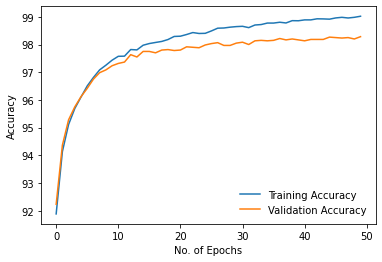

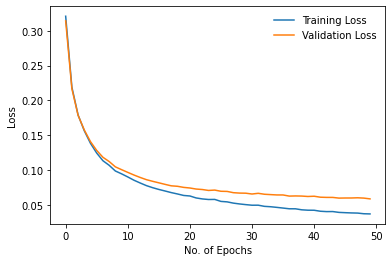

In [9]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [10]:
# load model pre trained
path_model = 'trained_models/MNIST/No_binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [60]:
evaluate(model_no_binary, test_loader)

Test Results - Avg accuracy: 98.22 Avg loss: 0.05


## Run Binary Netwwork:

In [12]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary


ITERATION - loss: 0.45: 100%|█████████▉| 1680/1688 [00:21<00:00, 139.72it/s]

Training Results - Epoch: 1  Avg accuracy: 86.73 Avg loss: 0.50


ITERATION - loss: 0.38:   1%|          | 20/1688 [00:22<04:14,  6.56it/s]   

Validation Results - Epoch: 1  Avg accuracy: 86.90 Avg loss: 0.49


ITERATION - loss: 0.36: 1690it [00:43, 136.62it/s]

Training Results - Epoch: 2  Avg accuracy: 89.43 Avg loss: 0.37


ITERATION - loss: 0.31:   1%|          | 20/1688 [00:44<04:19,  6.42it/s]

Validation Results - Epoch: 2  Avg accuracy: 89.38 Avg loss: 0.36


ITERATION - loss: 0.24: 1690it [01:05, 134.95it/s]

Training Results - Epoch: 3  Avg accuracy: 90.96 Avg loss: 0.31


ITERATION - loss: 0.20:   1%|          | 20/1688 [01:06<04:13,  6.57it/s]

Validation Results - Epoch: 3  Avg accuracy: 90.95 Avg loss: 0.31


ITERATION - loss: 0.22: 1690it [01:27, 138.56it/s]

Training Results - Epoch: 4  Avg accuracy: 91.89 Avg loss: 0.28


ITERATION - loss: 0.29:   1%|          | 20/1688 [01:28<04:16,  6.51it/s]

Validation Results - Epoch: 4  Avg accuracy: 91.87 Avg loss: 0.28


ITERATION - loss: 0.28: 1690it [01:49, 139.77it/s]

Training Results - Epoch: 5  Avg accuracy: 92.62 Avg loss: 0.25


ITERATION - loss: 0.30:   1%|          | 20/1688 [01:50<04:19,  6.43it/s]

Validation Results - Epoch: 5  Avg accuracy: 92.47 Avg loss: 0.25


ITERATION - loss: 0.26: 100%|█████████▉| 1680/1688 [02:11<00:00, 132.54it/s]

Training Results - Epoch: 6  Avg accuracy: 93.23 Avg loss: 0.23


ITERATION - loss: 0.17:   1%|          | 20/1688 [02:12<04:08,  6.70it/s]   

Validation Results - Epoch: 6  Avg accuracy: 93.23 Avg loss: 0.23


ITERATION - loss: 0.37: 1690it [02:33, 132.05it/s]

Training Results - Epoch: 7  Avg accuracy: 93.71 Avg loss: 0.21


ITERATION - loss: 0.13:   1%|          | 20/1688 [02:34<04:19,  6.42it/s]

Validation Results - Epoch: 7  Avg accuracy: 93.70 Avg loss: 0.21


ITERATION - loss: 0.18: 1690it [02:55, 142.68it/s]

Training Results - Epoch: 8  Avg accuracy: 94.15 Avg loss: 0.20


ITERATION - loss: 0.08:   1%|          | 20/1688 [02:56<04:29,  6.18it/s]

Validation Results - Epoch: 8  Avg accuracy: 94.18 Avg loss: 0.20


ITERATION - loss: 0.13: 1690it [03:17, 135.13it/s]

Training Results - Epoch: 9  Avg accuracy: 94.48 Avg loss: 0.19


ITERATION - loss: 0.17:   1%|          | 20/1688 [03:19<04:21,  6.38it/s]

Validation Results - Epoch: 9  Avg accuracy: 94.50 Avg loss: 0.19


ITERATION - loss: 0.11: 1690it [03:40, 122.27it/s]

Training Results - Epoch: 10  Avg accuracy: 94.76 Avg loss: 0.18


ITERATION - loss: 0.08:   1%|          | 20/1688 [03:41<04:16,  6.50it/s]

Validation Results - Epoch: 10  Avg accuracy: 94.78 Avg loss: 0.18


ITERATION - loss: 0.19: 100%|█████████▉| 1680/1688 [04:03<00:00, 120.71it/s]

Training Results - Epoch: 11  Avg accuracy: 94.86 Avg loss: 0.17


ITERATION - loss: 0.14:   1%|          | 20/1688 [04:04<04:27,  6.23it/s]   

Validation Results - Epoch: 11  Avg accuracy: 94.88 Avg loss: 0.17


ITERATION - loss: 0.18: 1690it [04:25, 138.12it/s]

Training Results - Epoch: 12  Avg accuracy: 95.15 Avg loss: 0.17


ITERATION - loss: 0.12:   1%|          | 20/1688 [04:26<04:24,  6.31it/s]

Validation Results - Epoch: 12  Avg accuracy: 95.17 Avg loss: 0.17


ITERATION - loss: 0.18: 1690it [04:47, 137.97it/s]

Training Results - Epoch: 13  Avg accuracy: 95.37 Avg loss: 0.16


ITERATION - loss: 0.10:   1%|          | 20/1688 [04:49<04:24,  6.31it/s]

Validation Results - Epoch: 13  Avg accuracy: 95.20 Avg loss: 0.16


ITERATION - loss: 0.27: 1690it [05:10, 132.43it/s]

Training Results - Epoch: 14  Avg accuracy: 95.58 Avg loss: 0.15


ITERATION - loss: 0.12:   1%|          | 20/1688 [05:11<04:27,  6.24it/s]

Validation Results - Epoch: 14  Avg accuracy: 95.43 Avg loss: 0.15


ITERATION - loss: 0.03: 1690it [05:32, 132.90it/s]

Training Results - Epoch: 15  Avg accuracy: 95.67 Avg loss: 0.15


ITERATION - loss: 0.38:   1%|          | 20/1688 [05:33<04:13,  6.58it/s]

Validation Results - Epoch: 15  Avg accuracy: 95.53 Avg loss: 0.15


ITERATION - loss: 0.17: 100%|█████████▉| 1680/1688 [05:54<00:00, 132.73it/s]

Training Results - Epoch: 16  Avg accuracy: 95.82 Avg loss: 0.14


ITERATION - loss: 0.23:   1%|          | 20/1688 [05:55<04:19,  6.43it/s]   

Validation Results - Epoch: 16  Avg accuracy: 95.60 Avg loss: 0.15


ITERATION - loss: 0.04: 1690it [06:16, 133.45it/s]

Training Results - Epoch: 17  Avg accuracy: 95.93 Avg loss: 0.14


ITERATION - loss: 0.08:   1%|          | 20/1688 [06:17<04:16,  6.51it/s]

Validation Results - Epoch: 17  Avg accuracy: 95.87 Avg loss: 0.14


ITERATION - loss: 0.07: 1690it [06:38, 140.60it/s]

Training Results - Epoch: 18  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.10:   1%|          | 20/1688 [06:40<04:16,  6.50it/s]

Validation Results - Epoch: 18  Avg accuracy: 95.88 Avg loss: 0.14


ITERATION - loss: 0.07: 1690it [07:01, 134.44it/s]

Training Results - Epoch: 19  Avg accuracy: 96.12 Avg loss: 0.13


ITERATION - loss: 0.01:   1%|          | 20/1688 [07:02<04:19,  6.42it/s]

Validation Results - Epoch: 19  Avg accuracy: 95.83 Avg loss: 0.14


ITERATION - loss: 0.08: 1690it [07:23, 138.90it/s]

Training Results - Epoch: 20  Avg accuracy: 96.23 Avg loss: 0.13


ITERATION - loss: 0.08: 1690it [07:24, 138.90it/s]

Validation Results - Epoch: 20  Avg accuracy: 95.98 Avg loss: 0.13


ITERATION - loss: 0.14: 100%|█████████▉| 1680/1688 [07:45<00:00, 142.32it/s]

Training Results - Epoch: 21  Avg accuracy: 96.33 Avg loss: 0.13


ITERATION - loss: 0.05:   1%|          | 20/1688 [07:46<04:18,  6.46it/s]   

Validation Results - Epoch: 21  Avg accuracy: 96.08 Avg loss: 0.13


ITERATION - loss: 0.17: 1690it [08:07, 135.30it/s]

Training Results - Epoch: 22  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.15:   1%|          | 20/1688 [08:08<04:17,  6.48it/s]

Validation Results - Epoch: 22  Avg accuracy: 96.08 Avg loss: 0.13


ITERATION - loss: 0.12: 1690it [08:29, 142.85it/s]

Training Results - Epoch: 23  Avg accuracy: 96.48 Avg loss: 0.12


ITERATION - loss: 0.08:   1%|          | 20/1688 [08:30<04:22,  6.36it/s]

Validation Results - Epoch: 23  Avg accuracy: 96.28 Avg loss: 0.13


ITERATION - loss: 0.13: 1690it [08:51, 137.77it/s]

Training Results - Epoch: 24  Avg accuracy: 96.52 Avg loss: 0.12


ITERATION - loss: 0.05:   1%|          | 20/1688 [08:52<04:14,  6.56it/s]

Validation Results - Epoch: 24  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.39: 1690it [09:13, 142.70it/s]

Training Results - Epoch: 25  Avg accuracy: 96.58 Avg loss: 0.12


ITERATION - loss: 0.03:   1%|          | 20/1688 [09:14<04:18,  6.46it/s]

Validation Results - Epoch: 25  Avg accuracy: 96.47 Avg loss: 0.12


ITERATION - loss: 0.09: 100%|█████████▉| 1680/1688 [09:35<00:00, 136.89it/s]

Training Results - Epoch: 26  Avg accuracy: 96.67 Avg loss: 0.11


ITERATION - loss: 0.04:   1%|          | 20/1688 [09:36<04:21,  6.37it/s]   

Validation Results - Epoch: 26  Avg accuracy: 96.42 Avg loss: 0.12


ITERATION - loss: 0.08: 1690it [09:57, 139.91it/s]

Training Results - Epoch: 27  Avg accuracy: 96.73 Avg loss: 0.11


ITERATION - loss: 0.07:   1%|          | 20/1688 [09:58<04:19,  6.44it/s]

Validation Results - Epoch: 27  Avg accuracy: 96.52 Avg loss: 0.12


ITERATION - loss: 0.10: 1690it [10:19, 137.66it/s]

Training Results - Epoch: 28  Avg accuracy: 96.81 Avg loss: 0.11


ITERATION - loss: 0.07:   1%|          | 20/1688 [10:20<04:22,  6.35it/s]

Validation Results - Epoch: 28  Avg accuracy: 96.53 Avg loss: 0.12


ITERATION - loss: 0.38: 1690it [10:41, 140.29it/s]

Training Results - Epoch: 29  Avg accuracy: 96.83 Avg loss: 0.11


ITERATION - loss: 0.06:   1%|          | 20/1688 [10:42<04:28,  6.22it/s]

Validation Results - Epoch: 29  Avg accuracy: 96.55 Avg loss: 0.11


ITERATION - loss: 0.03: 1690it [11:04, 141.76it/s]

Training Results - Epoch: 30  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.01:   1%|          | 20/1688 [11:05<04:16,  6.50it/s]

Validation Results - Epoch: 30  Avg accuracy: 96.60 Avg loss: 0.11


ITERATION - loss: 0.08: 100%|█████████▉| 1680/1688 [11:26<00:00, 138.41it/s]

Training Results - Epoch: 31  Avg accuracy: 96.91 Avg loss: 0.11


ITERATION - loss: 0.21:   1%|          | 20/1688 [11:27<04:33,  6.09it/s]   

Validation Results - Epoch: 31  Avg accuracy: 96.73 Avg loss: 0.11


ITERATION - loss: 0.14: 1690it [11:48, 130.16it/s]

Training Results - Epoch: 32  Avg accuracy: 96.97 Avg loss: 0.10


ITERATION - loss: 0.04:   1%|          | 20/1688 [11:49<04:18,  6.46it/s]

Validation Results - Epoch: 32  Avg accuracy: 96.93 Avg loss: 0.11


ITERATION - loss: 0.26: 1690it [12:10, 146.38it/s]

Training Results - Epoch: 33  Avg accuracy: 96.99 Avg loss: 0.10


ITERATION - loss: 0.05:   1%|          | 20/1688 [12:11<04:15,  6.54it/s]

Validation Results - Epoch: 33  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.05: 1690it [12:32, 139.06it/s]

Training Results - Epoch: 34  Avg accuracy: 97.09 Avg loss: 0.10


ITERATION - loss: 0.12:   1%|          | 20/1688 [12:33<04:08,  6.71it/s]

Validation Results - Epoch: 34  Avg accuracy: 97.00 Avg loss: 0.11


ITERATION - loss: 0.04: 1690it [12:53, 140.53it/s]

Training Results - Epoch: 35  Avg accuracy: 97.10 Avg loss: 0.10


ITERATION - loss: 0.16:   1%|          | 20/1688 [12:54<04:19,  6.43it/s]

Validation Results - Epoch: 35  Avg accuracy: 96.87 Avg loss: 0.11


ITERATION - loss: 0.04: 100%|█████████▉| 1680/1688 [13:16<00:00, 136.69it/s]

Training Results - Epoch: 36  Avg accuracy: 97.12 Avg loss: 0.10


ITERATION - loss: 0.14:   1%|          | 20/1688 [13:17<04:26,  6.26it/s]   

Validation Results - Epoch: 36  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.03: 1690it [13:38, 141.94it/s]

Training Results - Epoch: 37  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.04:   1%|          | 20/1688 [13:39<04:20,  6.40it/s]

Validation Results - Epoch: 37  Avg accuracy: 97.00 Avg loss: 0.10


ITERATION - loss: 0.13: 1690it [14:00, 145.19it/s]

Training Results - Epoch: 38  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.16:   1%|          | 20/1688 [14:01<04:16,  6.50it/s]

Validation Results - Epoch: 38  Avg accuracy: 97.08 Avg loss: 0.10


ITERATION - loss: 0.13: 1690it [14:23, 134.14it/s]

Training Results - Epoch: 39  Avg accuracy: 97.24 Avg loss: 0.09


ITERATION - loss: 0.08:   1%|          | 20/1688 [14:24<04:26,  6.25it/s]

Validation Results - Epoch: 39  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.02: 1690it [14:45, 142.29it/s]

Training Results - Epoch: 40  Avg accuracy: 97.30 Avg loss: 0.09


ITERATION - loss: 0.22:   1%|          | 20/1688 [14:47<04:28,  6.22it/s]

Validation Results - Epoch: 40  Avg accuracy: 97.03 Avg loss: 0.10


ITERATION - loss: 0.11: 100%|█████████▉| 1680/1688 [15:07<00:00, 135.00it/s]

Training Results - Epoch: 41  Avg accuracy: 97.29 Avg loss: 0.09


ITERATION - loss: 0.03:   1%|          | 20/1688 [15:09<04:22,  6.35it/s]   

Validation Results - Epoch: 41  Avg accuracy: 97.05 Avg loss: 0.10


ITERATION - loss: 0.02: 1690it [15:30, 142.16it/s]

Training Results - Epoch: 42  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.11:   1%|          | 20/1688 [15:31<04:12,  6.61it/s]

Validation Results - Epoch: 42  Avg accuracy: 97.20 Avg loss: 0.10


ITERATION - loss: 0.12: 1690it [15:52, 137.16it/s]

Training Results - Epoch: 43  Avg accuracy: 97.36 Avg loss: 0.09


ITERATION - loss: 0.14:   1%|          | 20/1688 [15:53<04:21,  6.38it/s]

Validation Results - Epoch: 43  Avg accuracy: 97.17 Avg loss: 0.10


ITERATION - loss: 0.07: 1690it [16:14, 138.63it/s]

Training Results - Epoch: 44  Avg accuracy: 97.41 Avg loss: 0.09


ITERATION - loss: 0.06:   1%|          | 20/1688 [16:15<04:18,  6.45it/s]

Validation Results - Epoch: 44  Avg accuracy: 97.22 Avg loss: 0.10


ITERATION - loss: 0.19: 1690it [16:36, 137.86it/s]

Training Results - Epoch: 45  Avg accuracy: 97.44 Avg loss: 0.09


ITERATION - loss: 0.11:   1%|          | 20/1688 [16:38<04:14,  6.55it/s]

Validation Results - Epoch: 45  Avg accuracy: 97.37 Avg loss: 0.09


ITERATION - loss: 0.37: 100%|█████████▉| 1680/1688 [16:58<00:00, 135.37it/s]

Training Results - Epoch: 46  Avg accuracy: 97.44 Avg loss: 0.09


ITERATION - loss: 0.07:   1%|          | 20/1688 [17:00<04:22,  6.37it/s]   

Validation Results - Epoch: 46  Avg accuracy: 97.40 Avg loss: 0.10


ITERATION - loss: 0.11: 1690it [17:21, 142.19it/s]

Training Results - Epoch: 47  Avg accuracy: 97.49 Avg loss: 0.09


ITERATION - loss: 0.23:   1%|          | 20/1688 [17:22<04:22,  6.35it/s]

Validation Results - Epoch: 47  Avg accuracy: 97.27 Avg loss: 0.09


ITERATION - loss: 0.07: 1690it [17:44, 127.33it/s]

Training Results - Epoch: 48  Avg accuracy: 97.54 Avg loss: 0.08


ITERATION - loss: 0.04:   1%|          | 20/1688 [17:45<04:30,  6.17it/s]

Validation Results - Epoch: 48  Avg accuracy: 97.35 Avg loss: 0.09


ITERATION - loss: 0.15: 1690it [18:06, 137.68it/s]

Training Results - Epoch: 49  Avg accuracy: 97.56 Avg loss: 0.08


ITERATION - loss: 0.03:   1%|          | 20/1688 [18:07<04:28,  6.21it/s]

Validation Results - Epoch: 49  Avg accuracy: 97.40 Avg loss: 0.09


ITERATION - loss: 0.33: 1690it [18:28, 125.43it/s]

Training Results - Epoch: 50  Avg accuracy: 97.56 Avg loss: 0.08


ITERATION - loss: 0.33: 1690it [18:29, 125.43it/s]

Validation Results - Epoch: 50  Avg accuracy: 97.43 Avg loss: 0.09


ITERATION - loss: 0.33:   0%|          | 0/1688 [18:30<00:13, 125.43it/s]

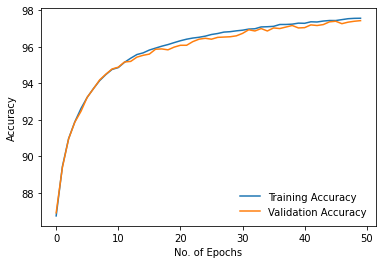

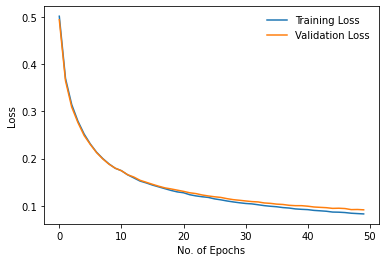

In [13]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [14]:
# load model pre trained
path_model = 'trained_models/MNIST/Binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [61]:
evaluate(model_binary, test_loader)

Test Results - Avg accuracy: 97.51 Avg loss: 0.09


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2
from visualize.viz import get_region_layer1, get_region_layer2, get_regions_interest, get_all_regions_max

# for regions extraction
import collections
from functools import partial
import cv2

## Load model:

In [6]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [7]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [8]:
print(model_no_binary)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [9]:
print(model_binary)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


## Visualization few predictions:

No binary model


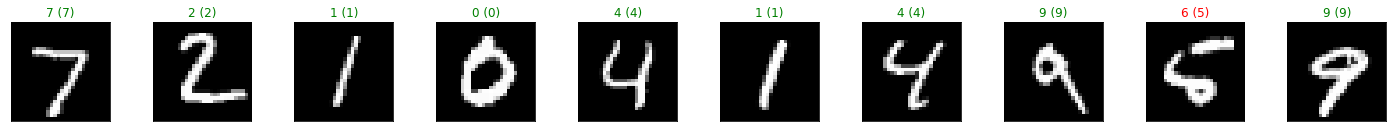

Binary model


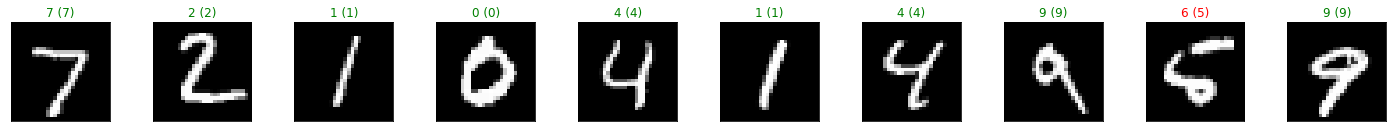

In [11]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 0


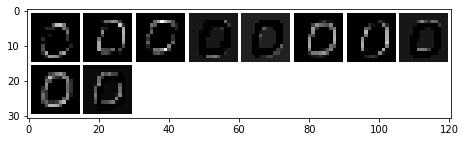

act_layer2 for label 0


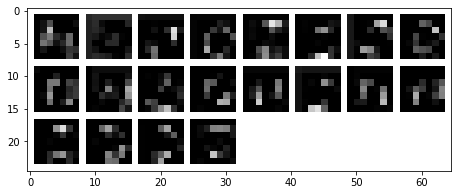

In [12]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 0


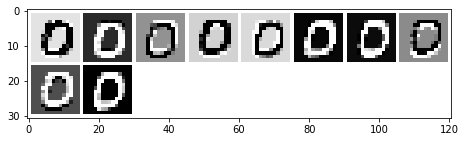

act_layer2 for label 0


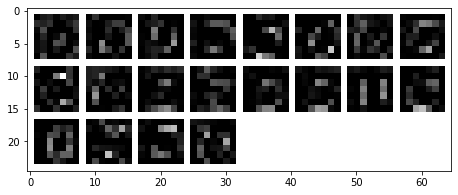

In [13]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:


layer:act_layer1 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


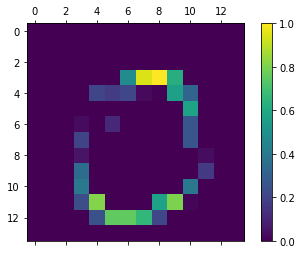

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


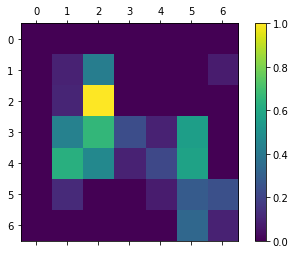

In [14]:
index_data = 10
viz_heatmap(model_no_binary, name_model, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


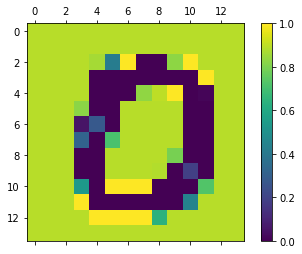

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


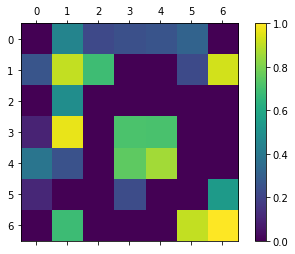

In [15]:
index_data = 10
viz_heatmap(model_binary, name_model, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


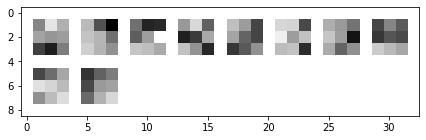

Visualization filters learned for layer: layer2


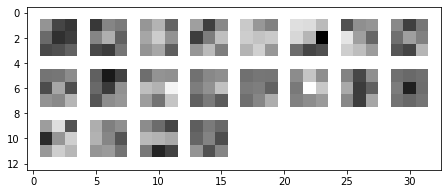

In [16]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


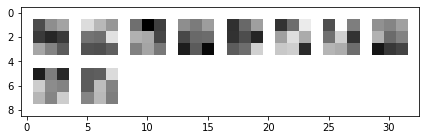

Visualization filters learned for layer: layer2


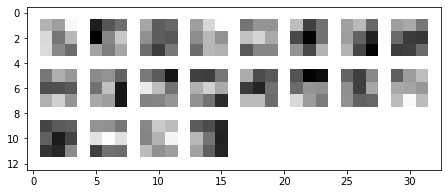

In [17]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

Visualization filters learned for layer: layer1


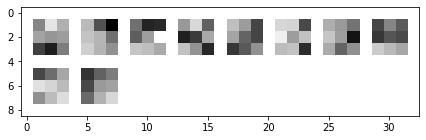

Visualization filters learned for layer: layer2


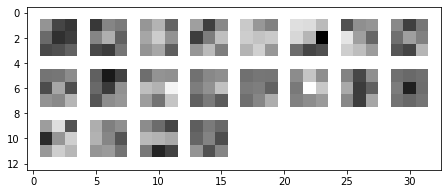

In [10]:
viz_filters(model_no_binary)

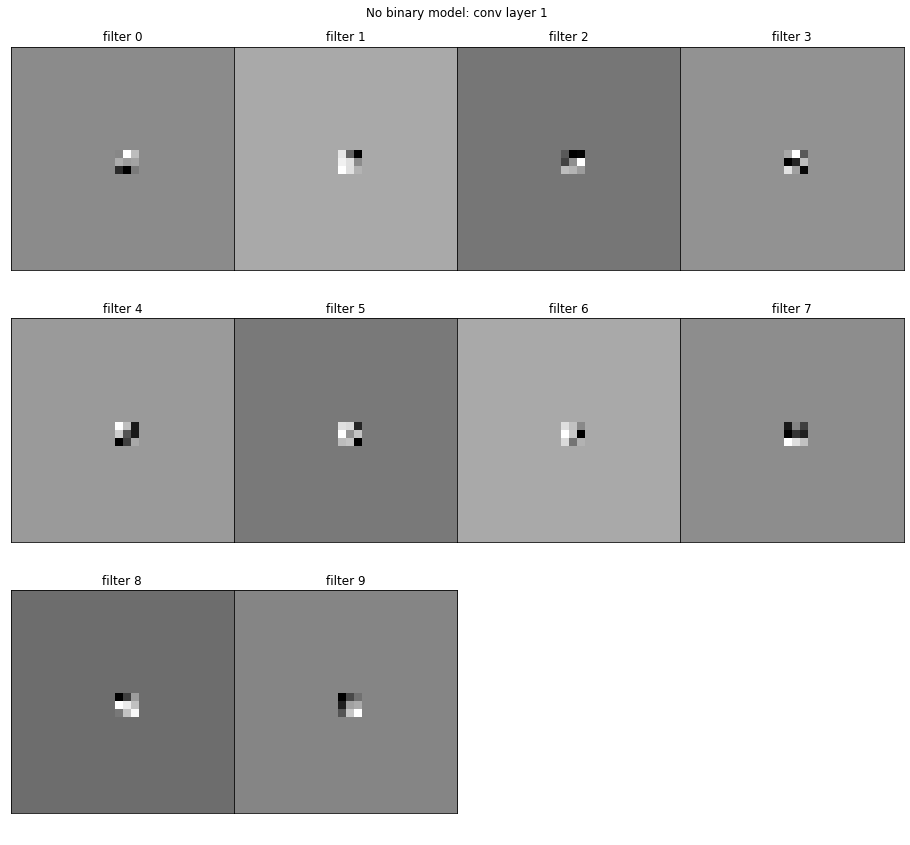

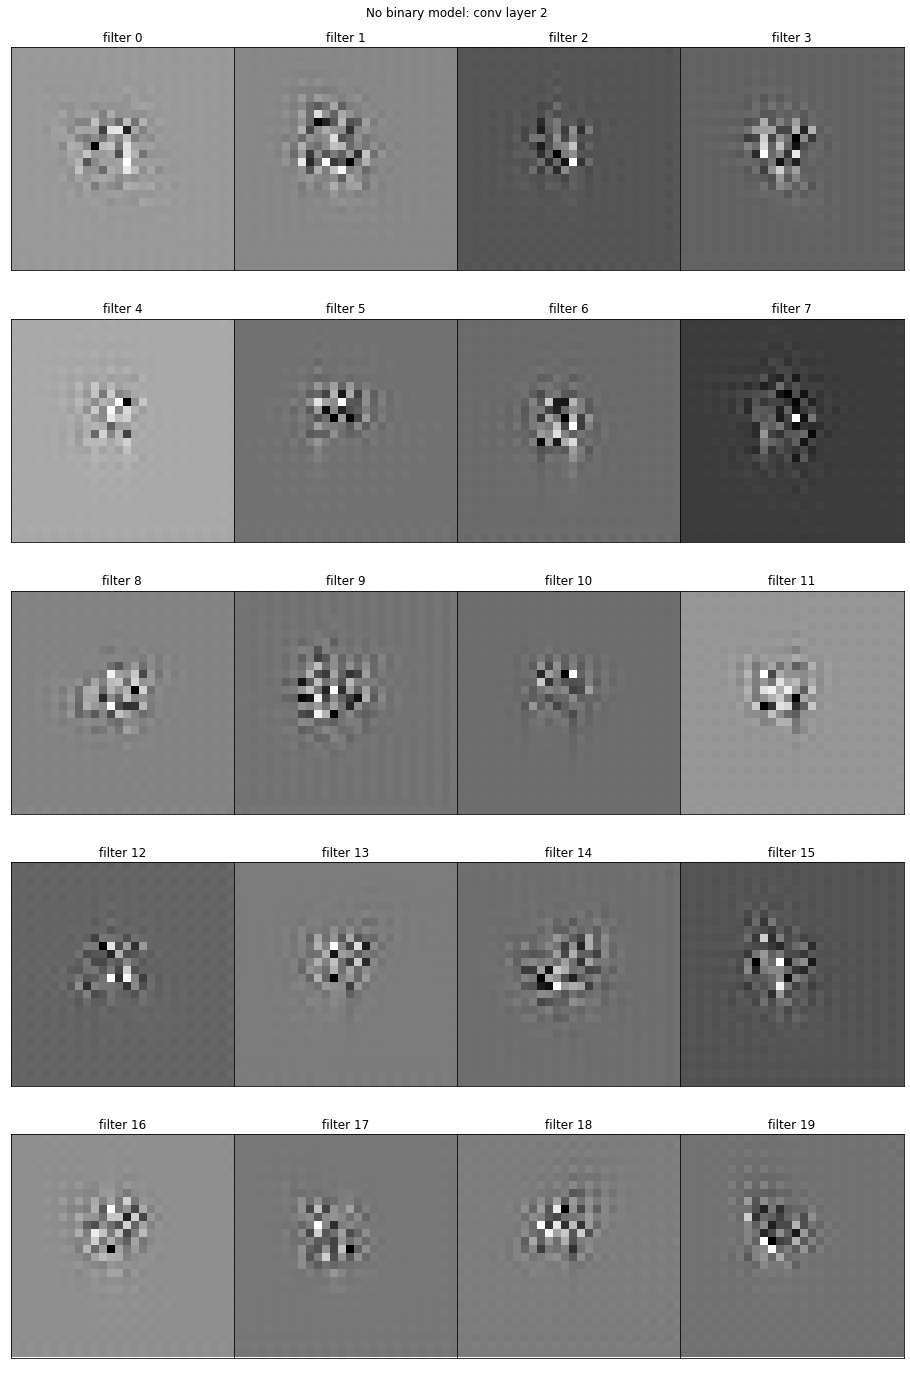

In [11]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, nb_channels=1, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = True
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = True
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

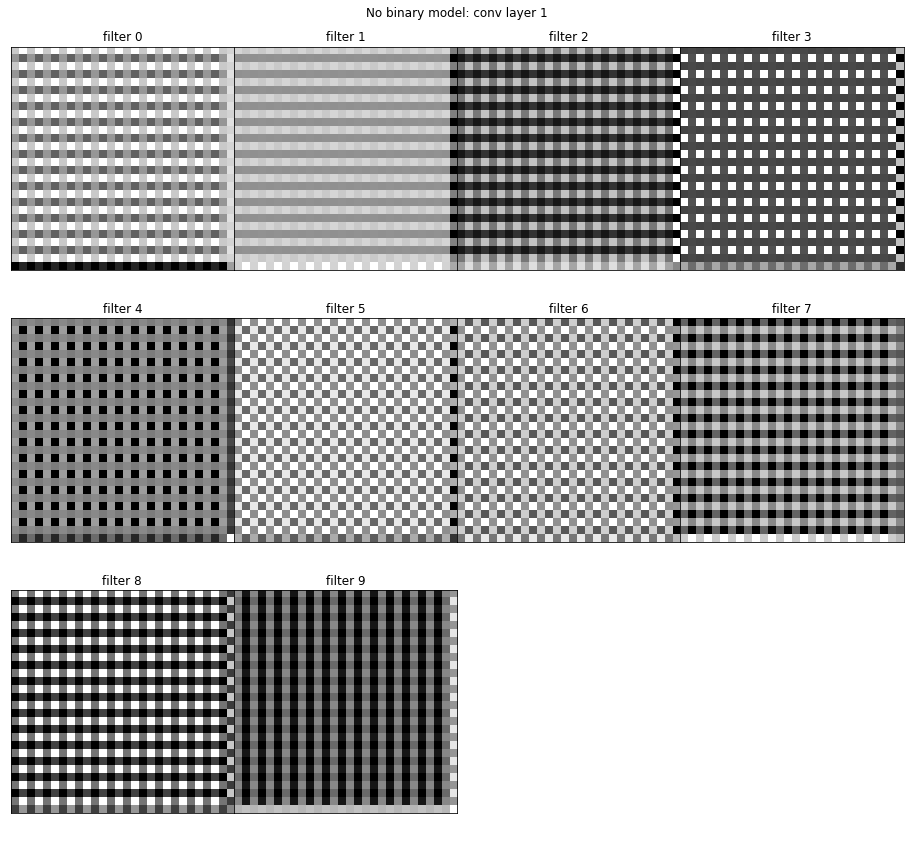

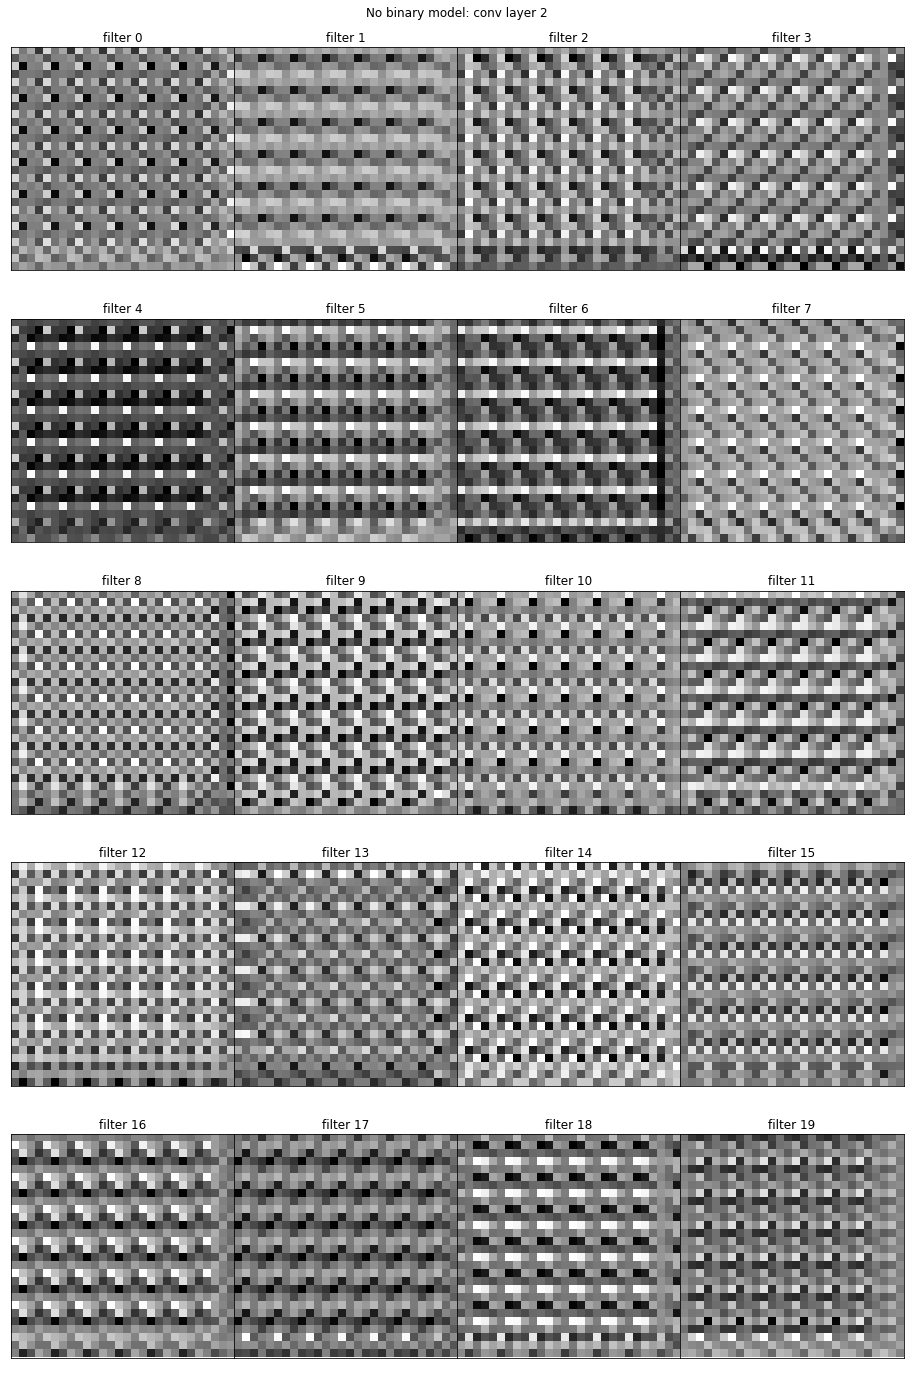

In [67]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, nb_channels=1, img_size=28)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_binary = model_binary.layer2
conv2_filters_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

lr=0.0001
num_iter=1000
MNIST = True

Visualization filters learned for layer: layer1


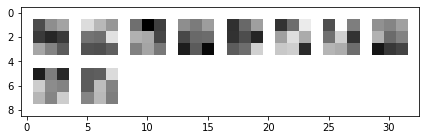

Visualization filters learned for layer: layer2


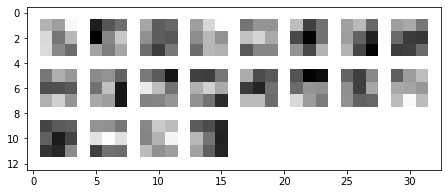

In [16]:
viz_filters(model_binary)

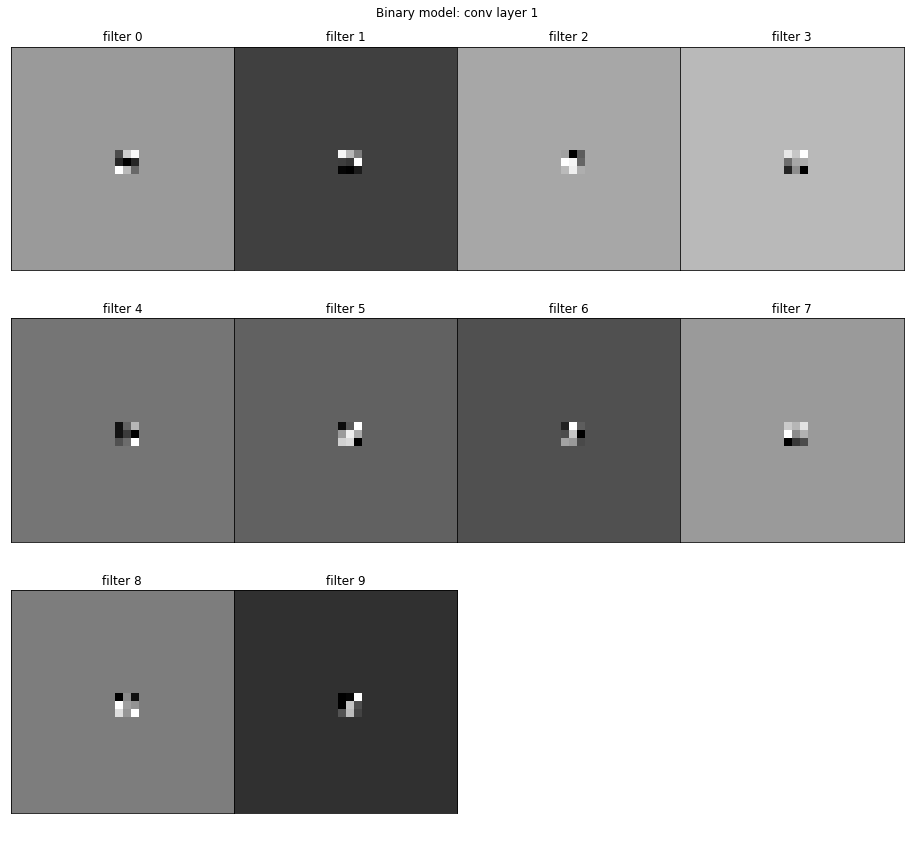

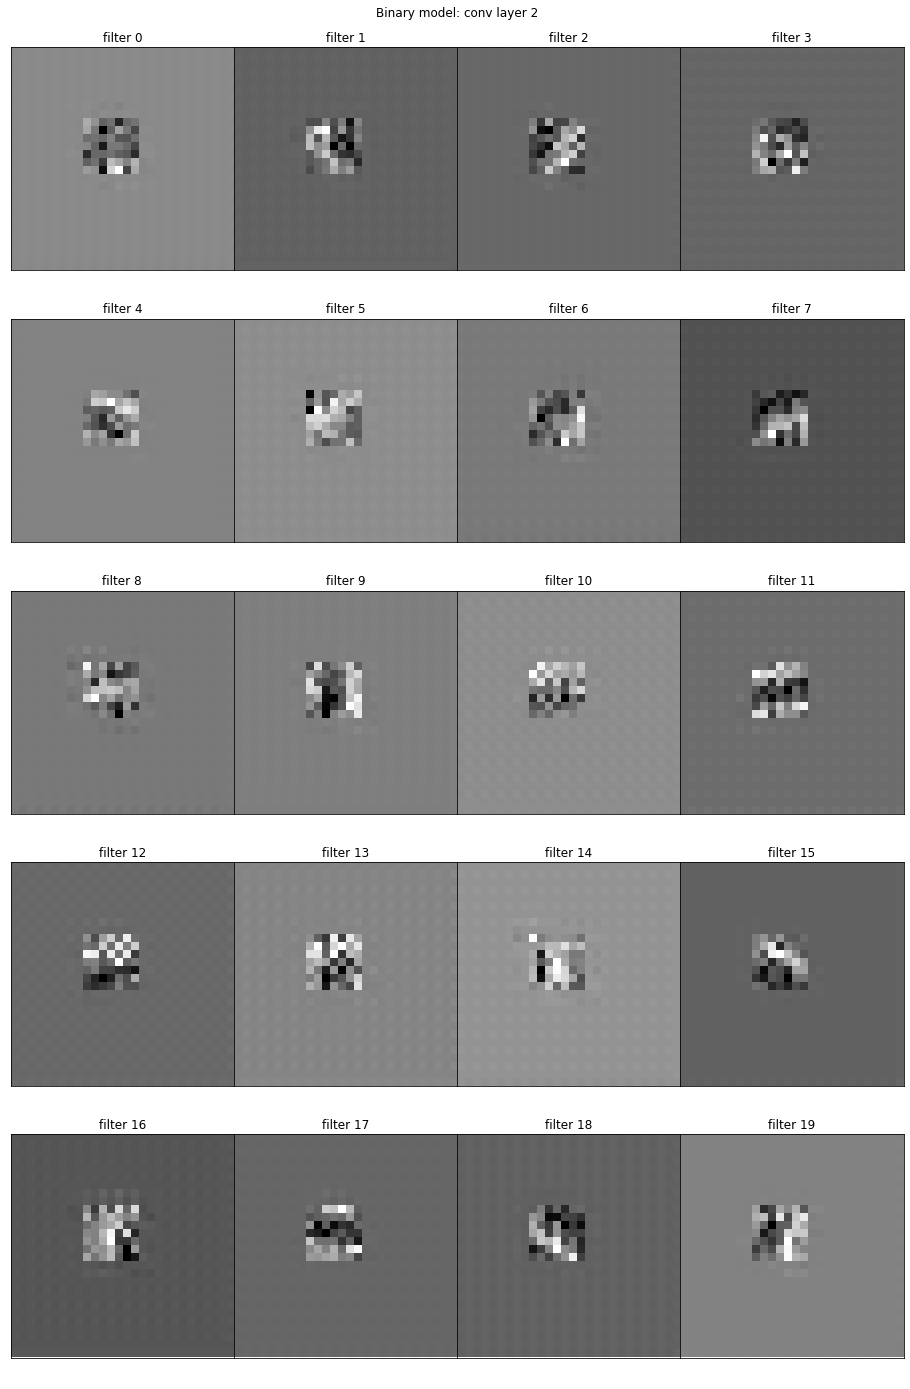

In [17]:
g_ascent_binary.visualize(conv1_binary, MNIST, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='Binary model: conv layer 1')
g_ascent_binary.visualize(conv2_binary, MNIST, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='Binary model: conv layer 2')

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())
     

In [10]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [11]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_no_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer1_no_binary_normalized = activation_final_normalized['layer1']
activation_layer2_no_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer1_no_binary_normalized.shape)
print(activation_layer2_no_binary_normalized.shape)

nb images: 10000
begin extraction regions
treating image n 0/10000, for layer: layer1
treating image n 1/10000, for layer: layer1
treating image n 2/10000, for layer: layer1
treating image n 3/10000, for layer: layer1
treating image n 4/10000, for layer: layer1
treating image n 5/10000, for layer: layer1
treating image n 6/10000, for layer: layer1
treating image n 7/10000, for layer: layer1
treating image n 8/10000, for layer: layer1
treating image n 9/10000, for layer: layer1
treating image n 10/10000, for layer: layer1
treating image n 11/10000, for layer: layer1
treating image n 12/10000, for layer: layer1
treating image n 13/10000, for layer: layer1
treating image n 14/10000, for layer: layer1
treating image n 15/10000, for layer: layer1
treating image n 16/10000, for layer: layer1
treating image n 17/10000, for layer: layer1
treating image n 18/10000, for layer: layer1
treating image n 19/10000, for layer: layer1
treating image n 20/10000, for layer: layer1
treating image n 21/100

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:994: RuntimeWarning: divide by zero encountered in true_divide
  activation_im_j_normalized[i] = (act_max.detach().numpy())/LA.norm(region, 1)


Streaming output truncated to the last 5000 lines.
treating image n 5007/10000, for layer: layer2
treating image n 5008/10000, for layer: layer2
treating image n 5009/10000, for layer: layer2
treating image n 5010/10000, for layer: layer2
treating image n 5011/10000, for layer: layer2
treating image n 5012/10000, for layer: layer2
treating image n 5013/10000, for layer: layer2
treating image n 5014/10000, for layer: layer2
treating image n 5015/10000, for layer: layer2
treating image n 5016/10000, for layer: layer2
treating image n 5017/10000, for layer: layer2
treating image n 5018/10000, for layer: layer2
treating image n 5019/10000, for layer: layer2
treating image n 5020/10000, for layer: layer2
treating image n 5021/10000, for layer: layer2
treating image n 5022/10000, for layer: layer2
treating image n 5023/10000, for layer: layer2
treating image n 5024/10000, for layer: layer2
treating image n 5025/10000, for layer: layer2
treating image n 5026/10000, for layer: layer2
treating 

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_no_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_no_binary_normalized)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [16]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [17]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final, activation_final_normalized = get_all_regions_max(loader, activations_binary, stride, padding, filter_size, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer1_binary_normalized = activation_final_normalized['layer1']
activation_layer2_binary_normalized = activation_final_normalized['layer2']

print(region_layer1_binary.shape)
print(region_layer2_binary.shape)
print(activation_layer1_binary.shape)
print(activation_layer2_binary.shape)
print(activation_layer1_binary_normalized.shape)
print(activation_layer2_binary_normalized.shape)

nb images: 10000
begin extraction regions
treating image n 0/10000, for layer: layer1
treating image n 1/10000, for layer: layer1
treating image n 2/10000, for layer: layer1
treating image n 3/10000, for layer: layer1
treating image n 4/10000, for layer: layer1
treating image n 5/10000, for layer: layer1
treating image n 6/10000, for layer: layer1
treating image n 7/10000, for layer: layer1
treating image n 8/10000, for layer: layer1
treating image n 9/10000, for layer: layer1
treating image n 10/10000, for layer: layer1
treating image n 11/10000, for layer: layer1
treating image n 12/10000, for layer: layer1
treating image n 13/10000, for layer: layer1
treating image n 14/10000, for layer: layer1
treating image n 15/10000, for layer: layer1
treating image n 16/10000, for layer: layer1
treating image n 17/10000, for layer: layer1
treating image n 18/10000, for layer: layer1
treating image n 19/10000, for layer: layer1
treating image n 20/10000, for layer: layer1
treating image n 21/100

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:994: RuntimeWarning: divide by zero encountered in true_divide
  activation_im_j_normalized[i] = (act_max.detach().numpy())/LA.norm(region, 1)


Streaming output truncated to the last 5000 lines.
treating image n 5007/10000, for layer: layer2
treating image n 5008/10000, for layer: layer2
treating image n 5009/10000, for layer: layer2
treating image n 5010/10000, for layer: layer2
treating image n 5011/10000, for layer: layer2
treating image n 5012/10000, for layer: layer2
treating image n 5013/10000, for layer: layer2
treating image n 5014/10000, for layer: layer2
treating image n 5015/10000, for layer: layer2
treating image n 5016/10000, for layer: layer2
treating image n 5017/10000, for layer: layer2
treating image n 5018/10000, for layer: layer2
treating image n 5019/10000, for layer: layer2
treating image n 5020/10000, for layer: layer2
treating image n 5021/10000, for layer: layer2
treating image n 5022/10000, for layer: layer2
treating image n 5023/10000, for layer: layer2
treating image n 5024/10000, for layer: layer2
treating image n 5025/10000, for layer: layer2
treating image n 5026/10000, for layer: layer2
treating 

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', region_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', region_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', activation_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', activation_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', activation_layer1_binary_normalized)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', activation_layer2_binary_normalized)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_no_binary_normalized = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', allow_pickle=True)
activation_layer1_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1_normalized.npy', allow_pickle=True)
activation_layer2_binary_normalized = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2_normalized.npy', allow_pickle=True)

#### Viz:

Visualization filters learned for layer: layer1


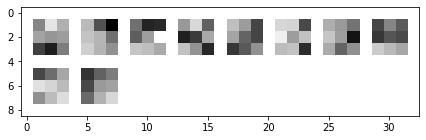

Visualization filters learned for layer: layer2


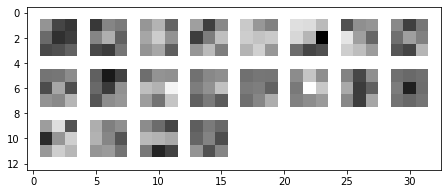

In [21]:
viz_filters(model_no_binary)

##### No binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


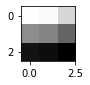

normalized region:


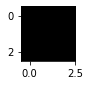

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


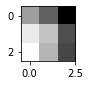

normalized region:


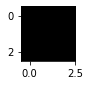

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


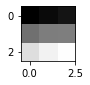

normalized region:


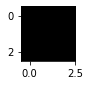

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


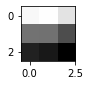

normalized region:


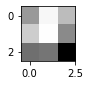

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


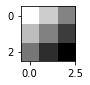

normalized region:


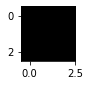

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


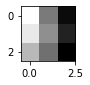

normalized region:


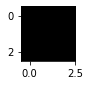

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


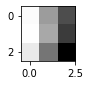

normalized region:


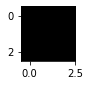

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


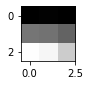

normalized region:


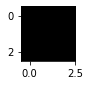

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


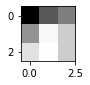

normalized region:


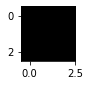

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


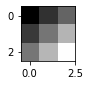

normalized region:


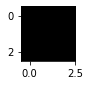

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


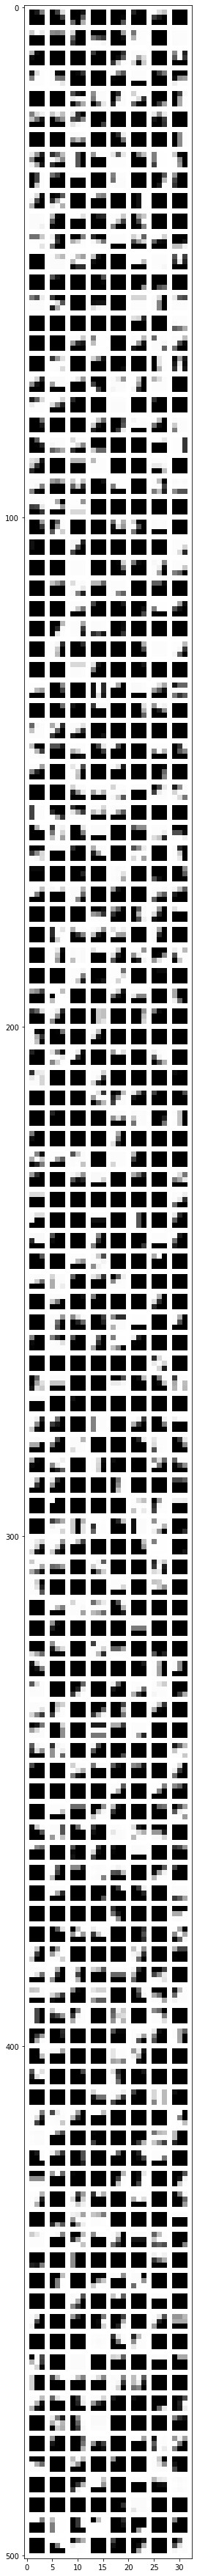

normalized regions:


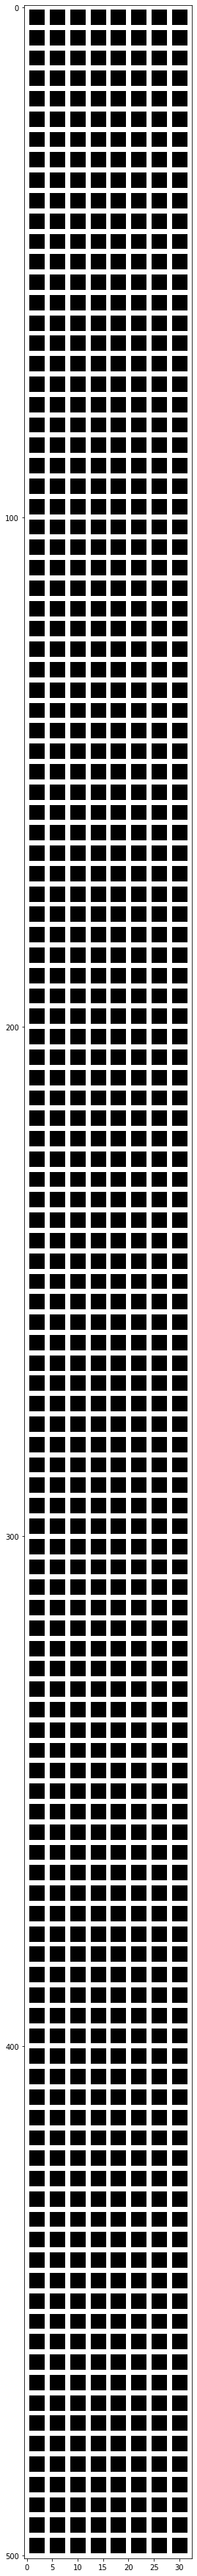

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


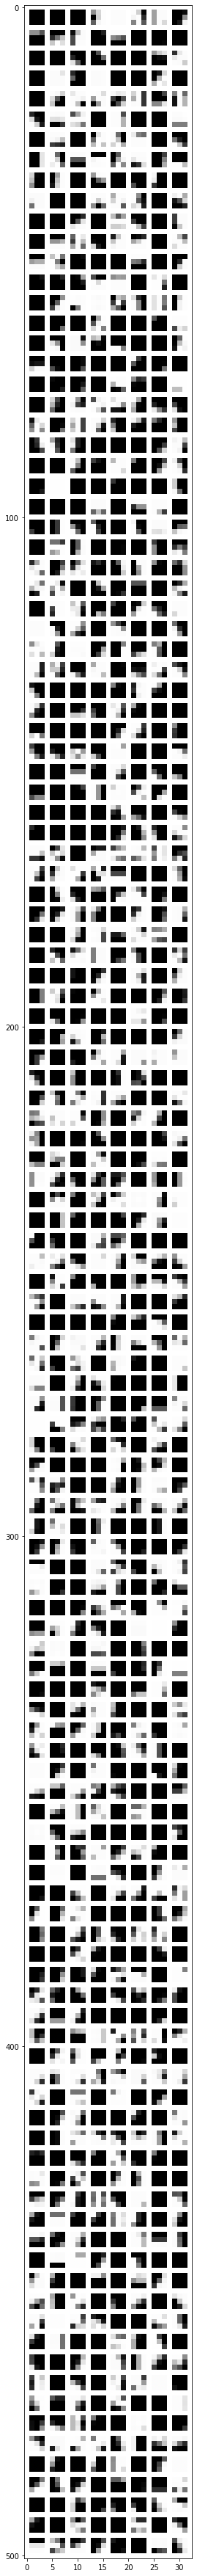

normalized regions:


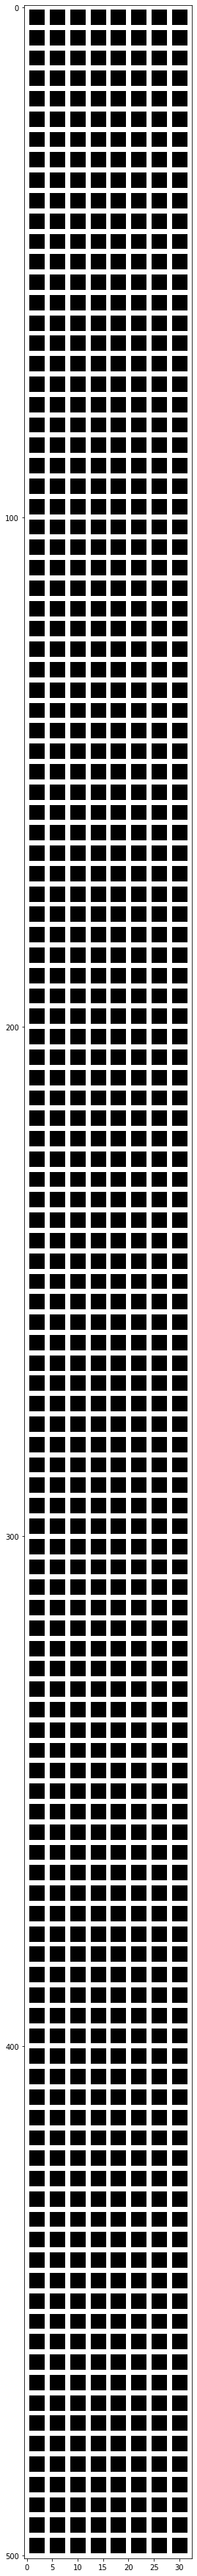

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


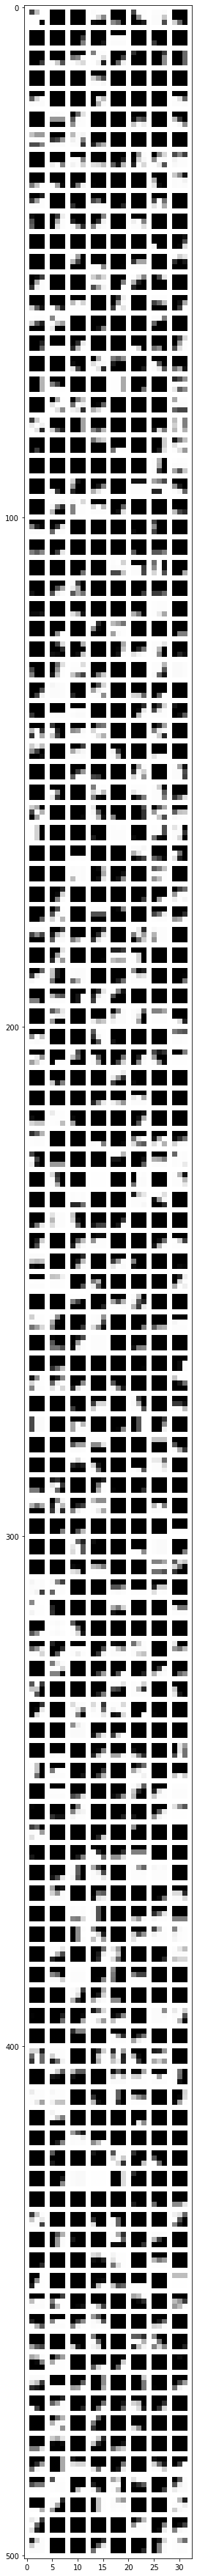

normalized regions:


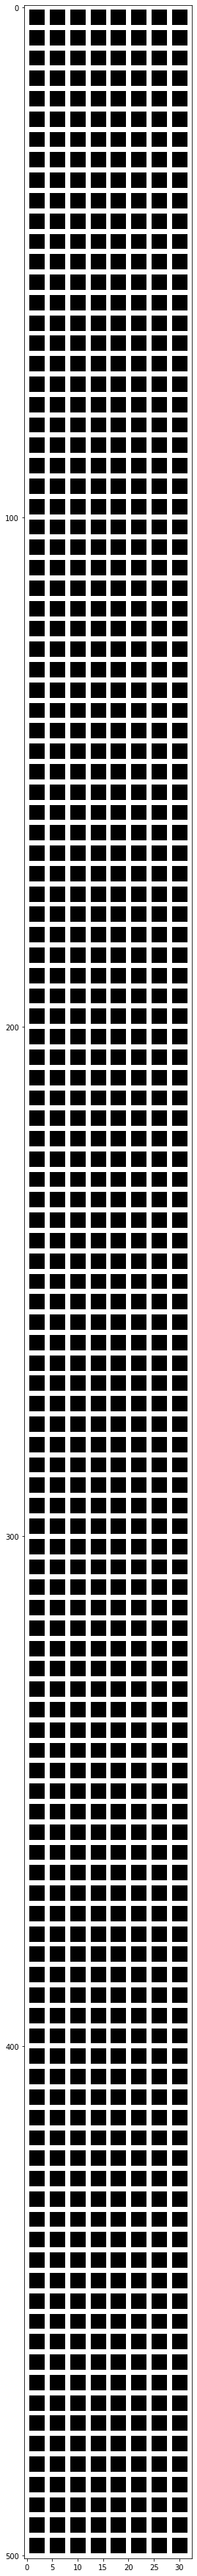

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


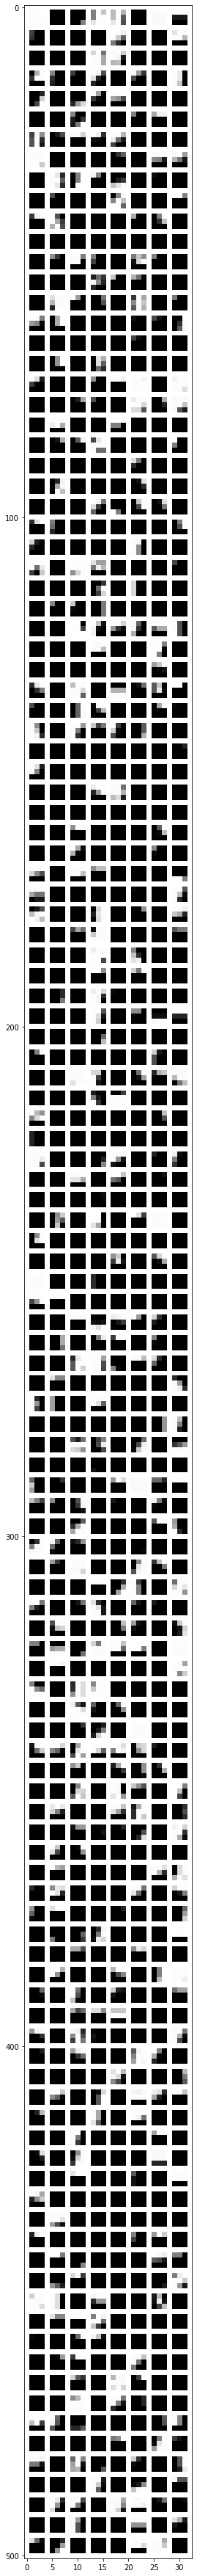

normalized regions:


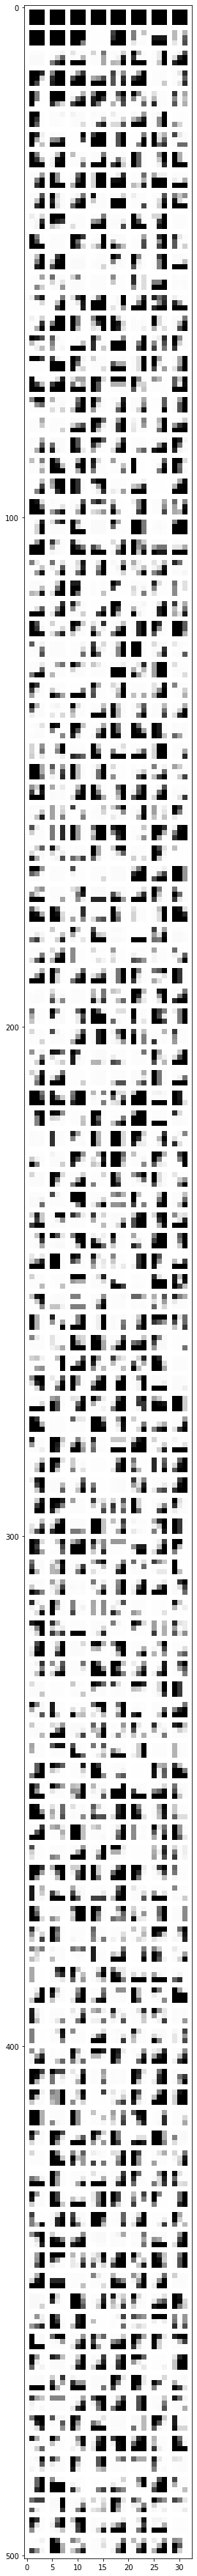

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


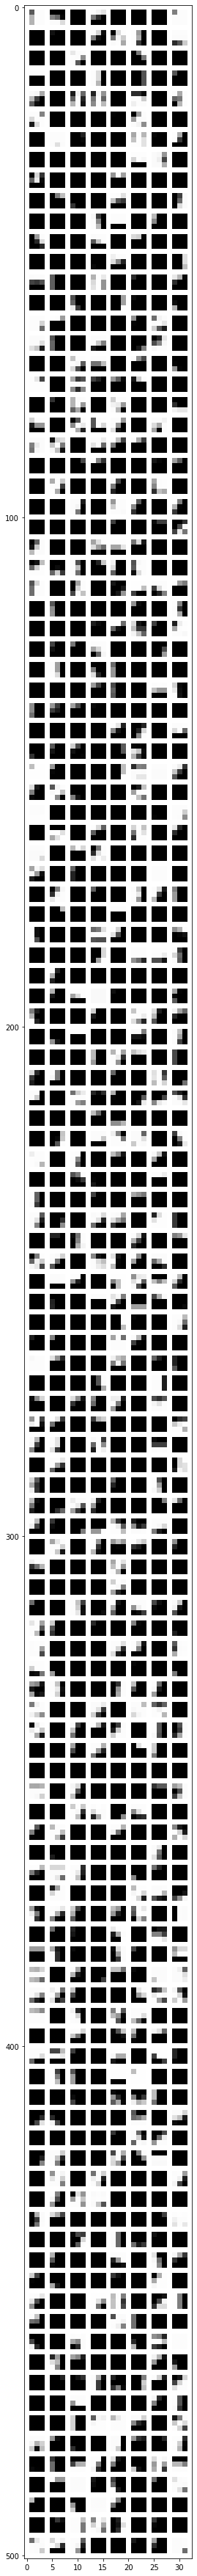

normalized regions:


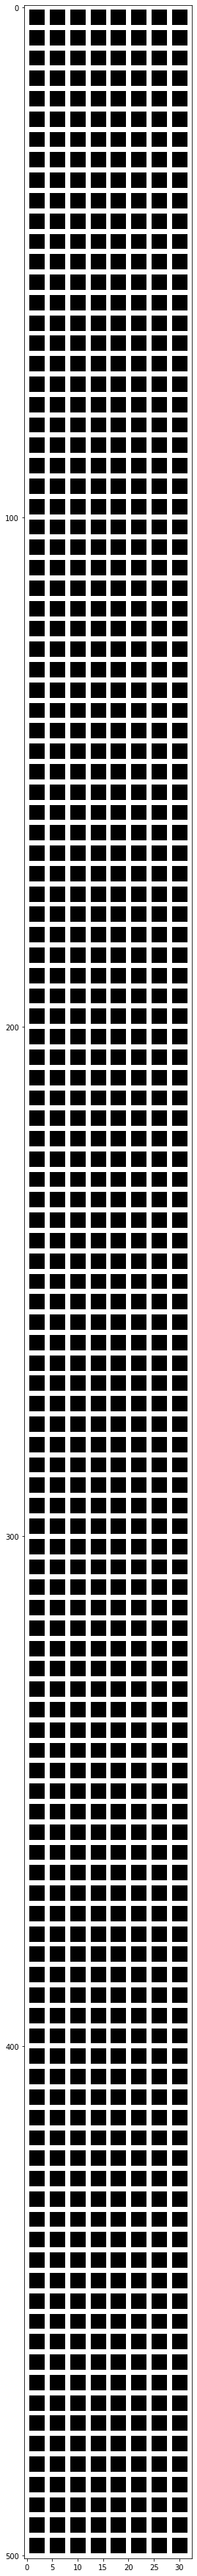

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


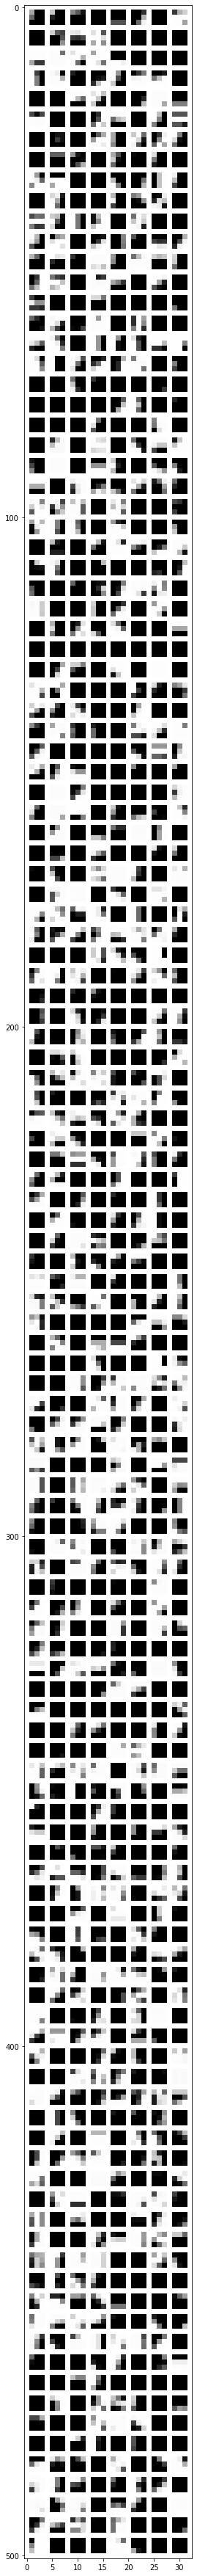

normalized regions:


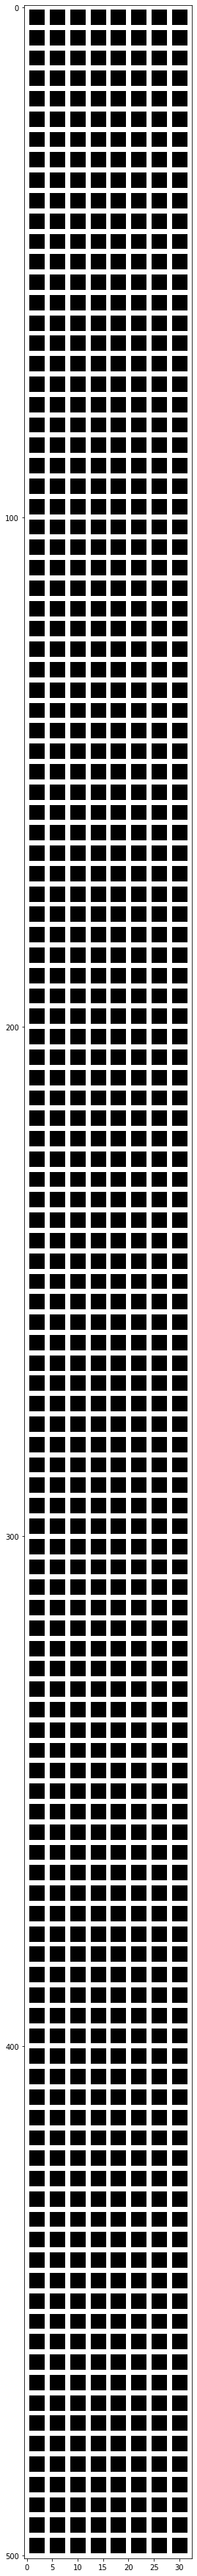

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


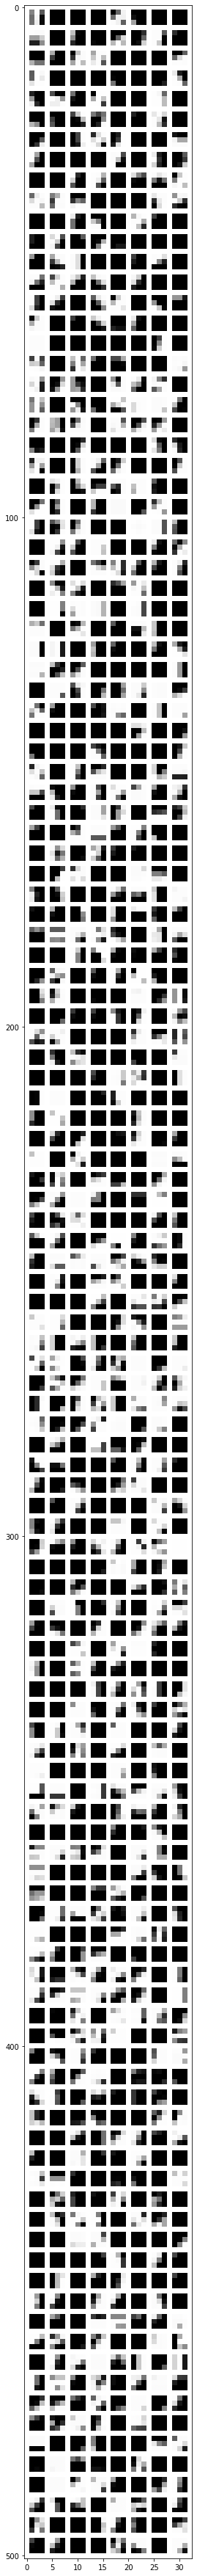

normalized regions:


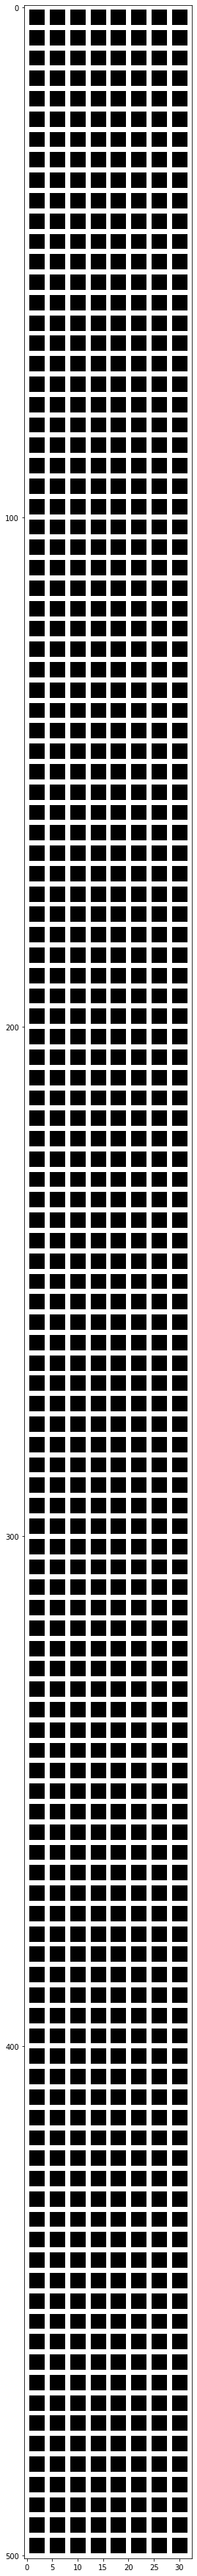

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


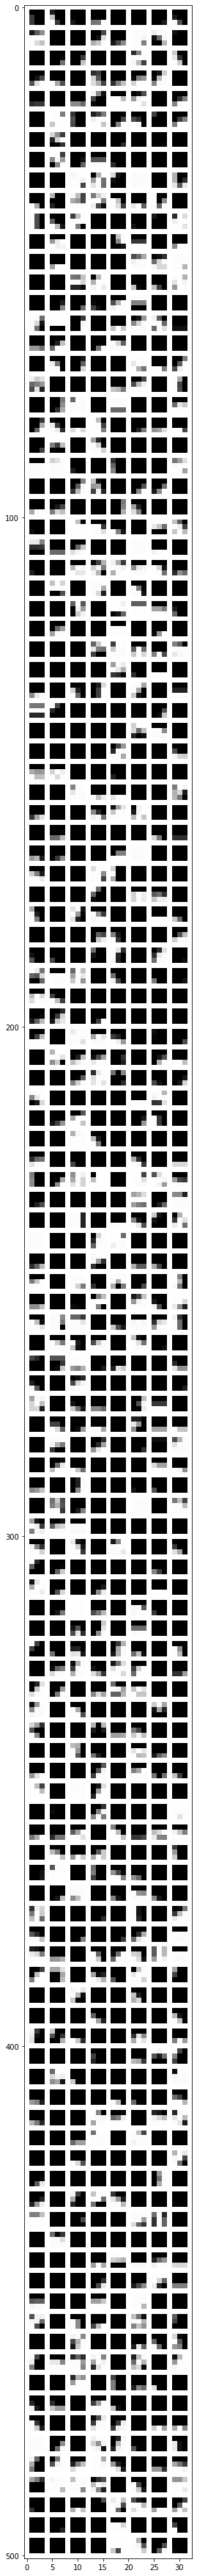

normalized regions:


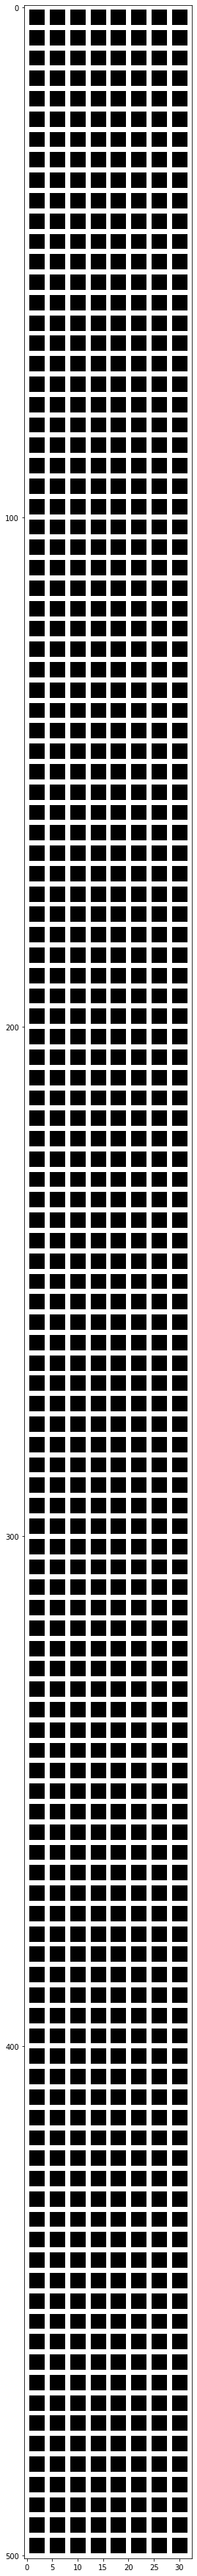

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


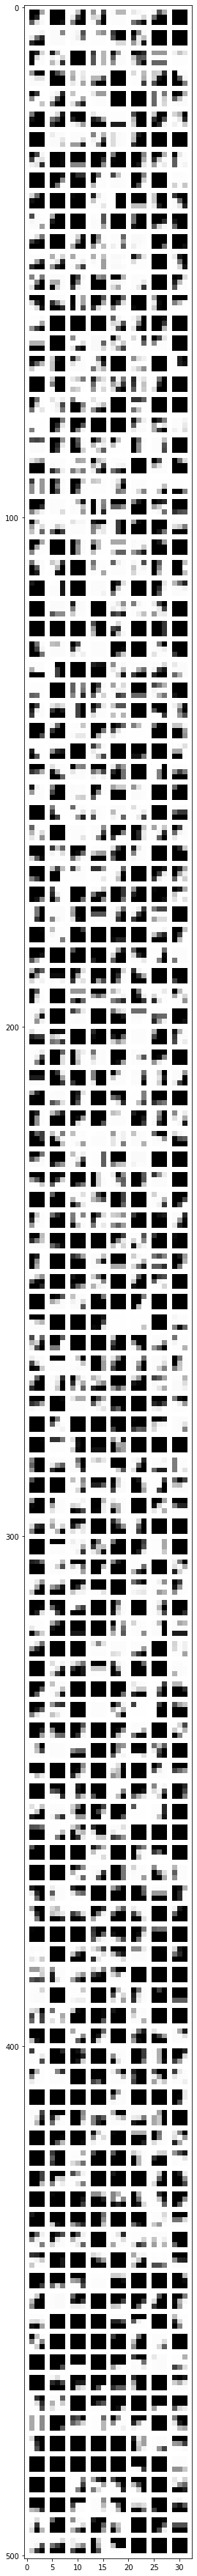

normalized regions:


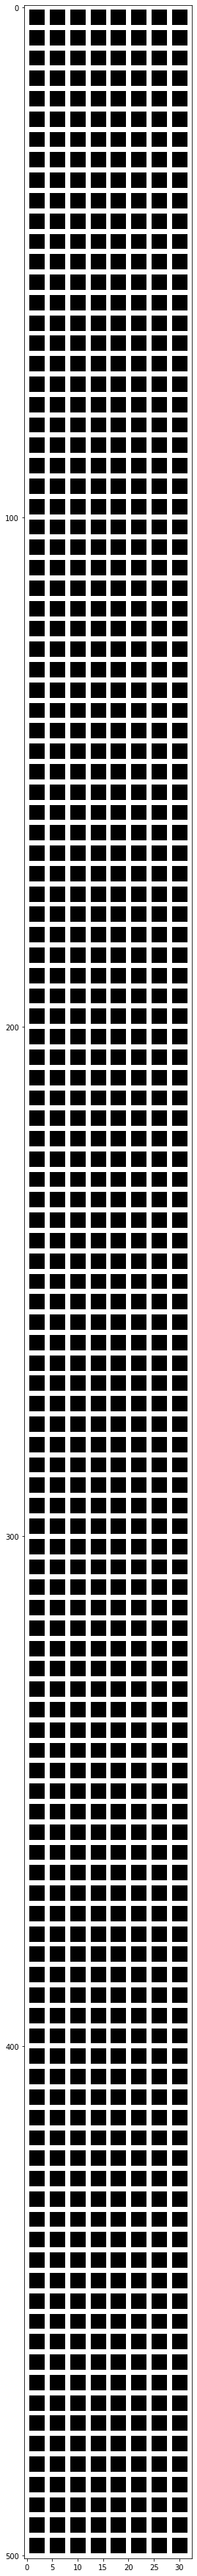

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


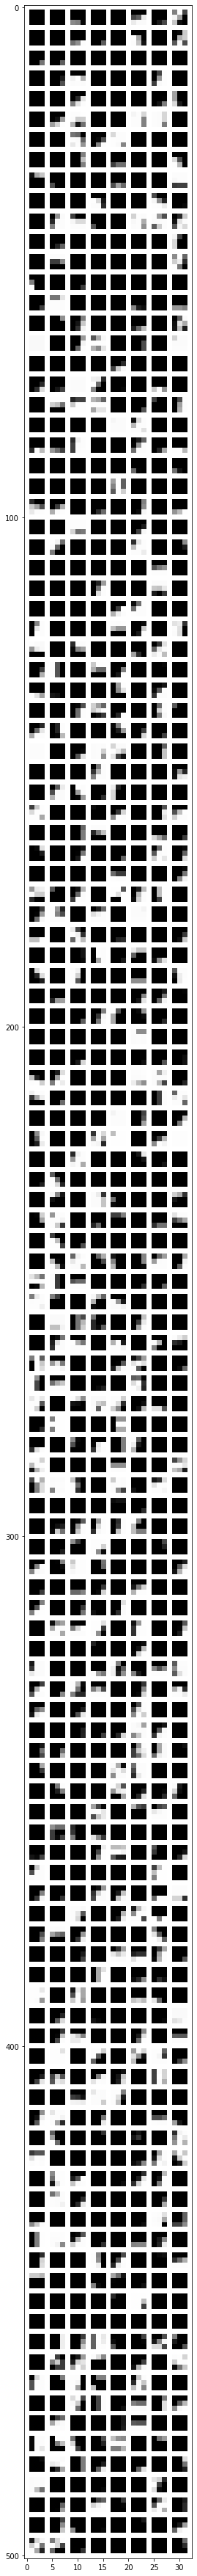

normalized regions:


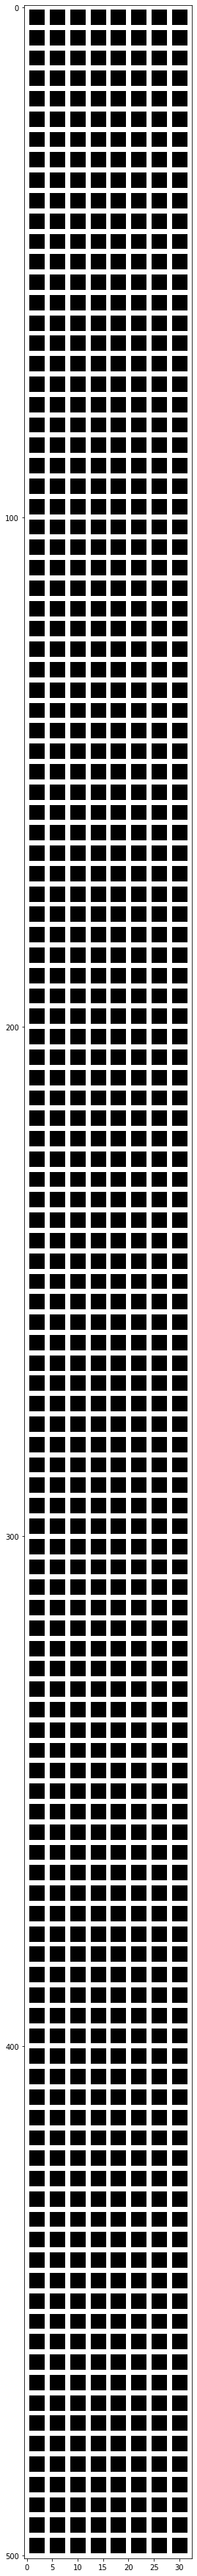

In [22]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary
activations_normalized = activation_layer1_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

In [23]:
activation_values

[array([0.79804754, 0.79804754, 0.79558432, 0.79558432, 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.793082  ,
        0.793082  , 0.793082  , 0.793082  , 0.793082  , 0.7923367 ,
        0.79191238, 0.79183894, 0.79148471, 0.7914781 , 0.79117286,
        0.79107058, 0.79107058, 0.79098642, 0.79

In [24]:
activation_values_normalized

[array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf

##### No binary model layer2:

In [25]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary
activations_normalized = activation_layer2_no_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

##### Binary model layer1:

Visualization filters learned for layer: layer1


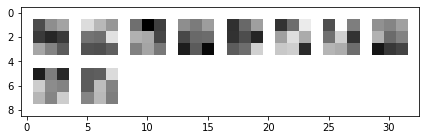

Visualization filters learned for layer: layer2


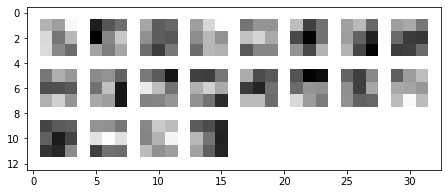

In [26]:
viz_filters(model_binary)

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


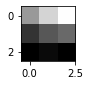

normalized region:


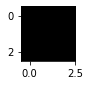

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


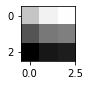

normalized region:


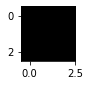

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


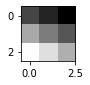

normalized region:


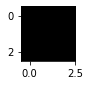

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


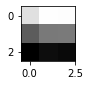

normalized region:


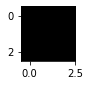

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


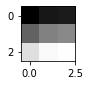

normalized region:


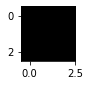

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


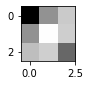

normalized region:


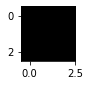

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


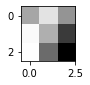

normalized region:


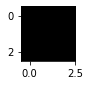

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


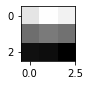

normalized region:


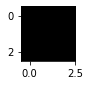

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


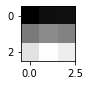

normalized region:


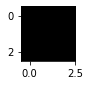

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


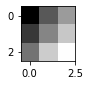

normalized region:


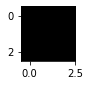

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


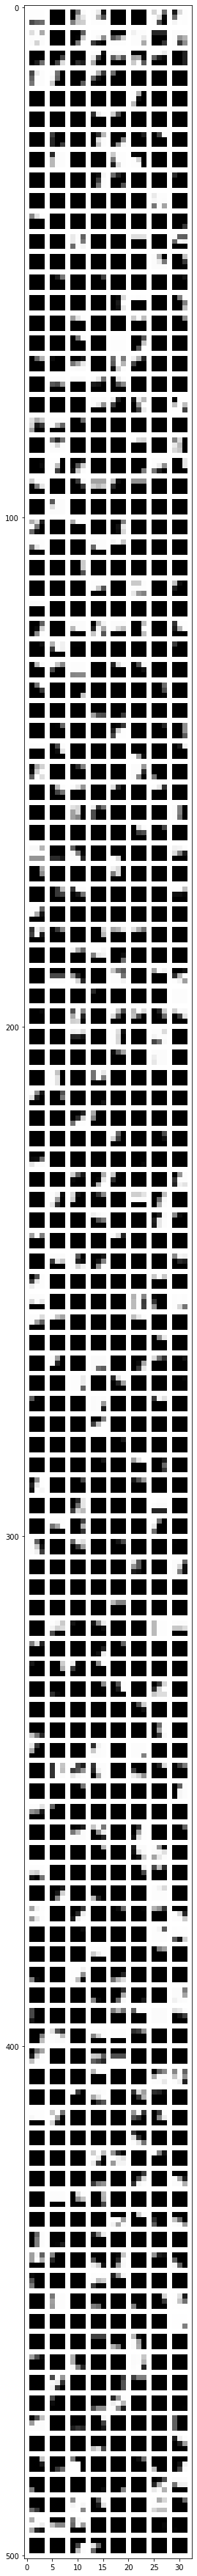

normalized regions:


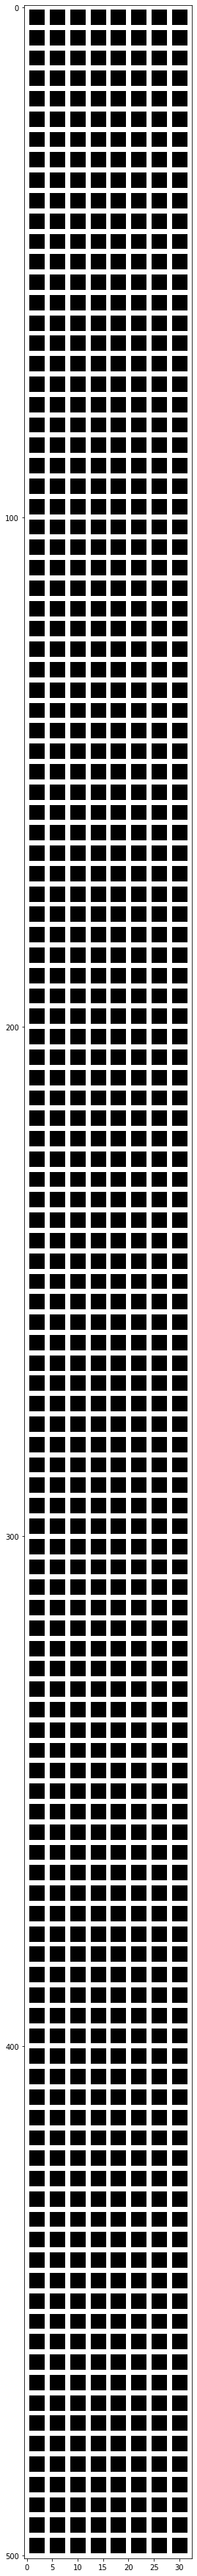

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


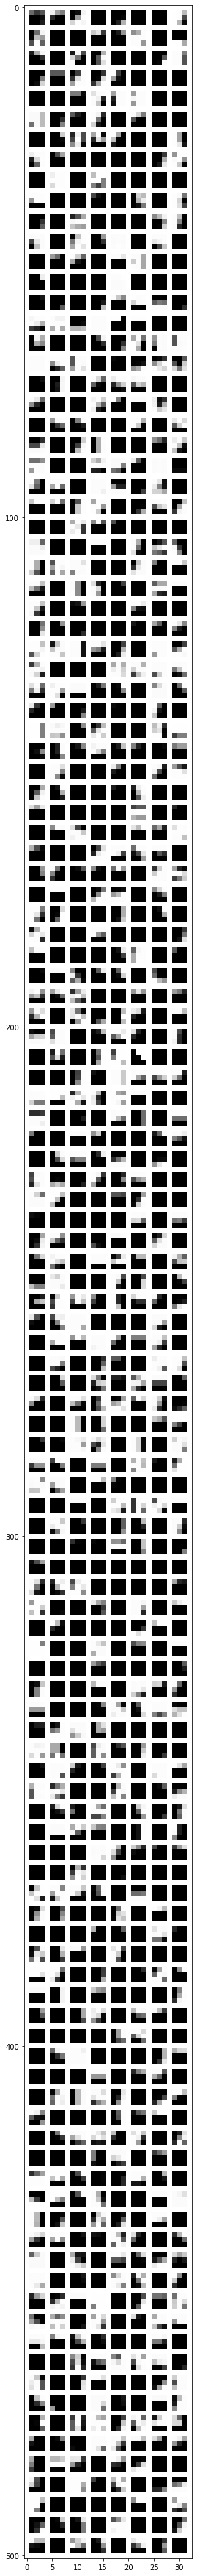

normalized regions:


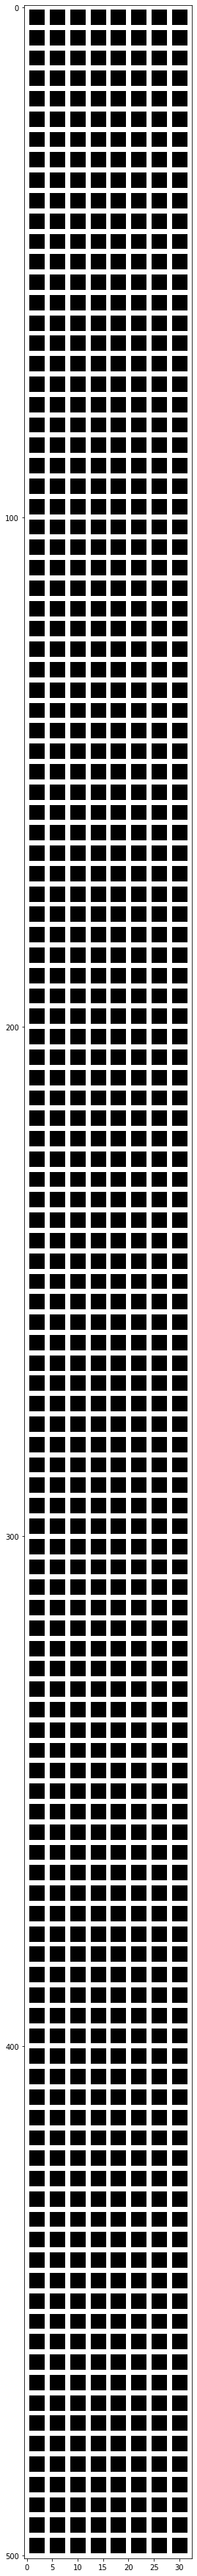

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


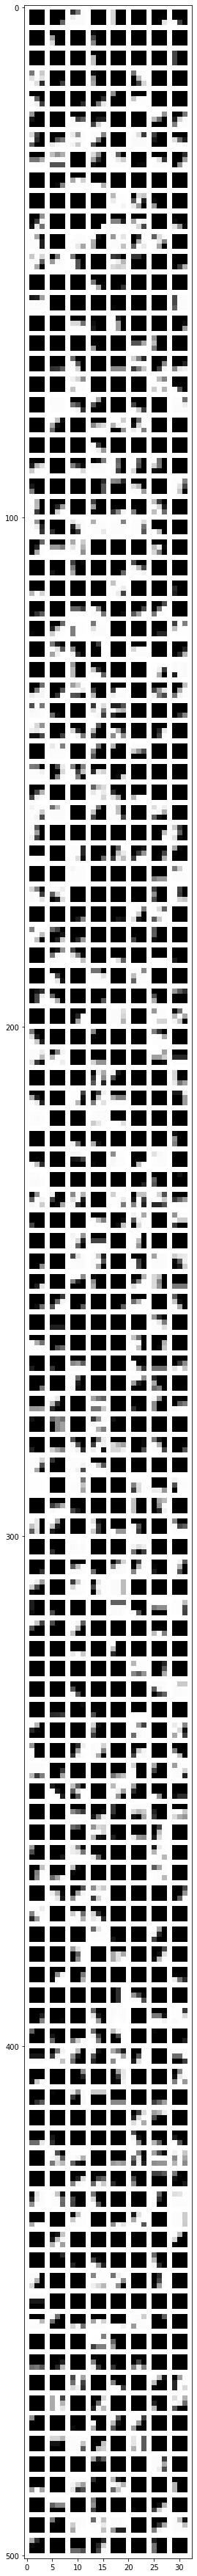

normalized regions:


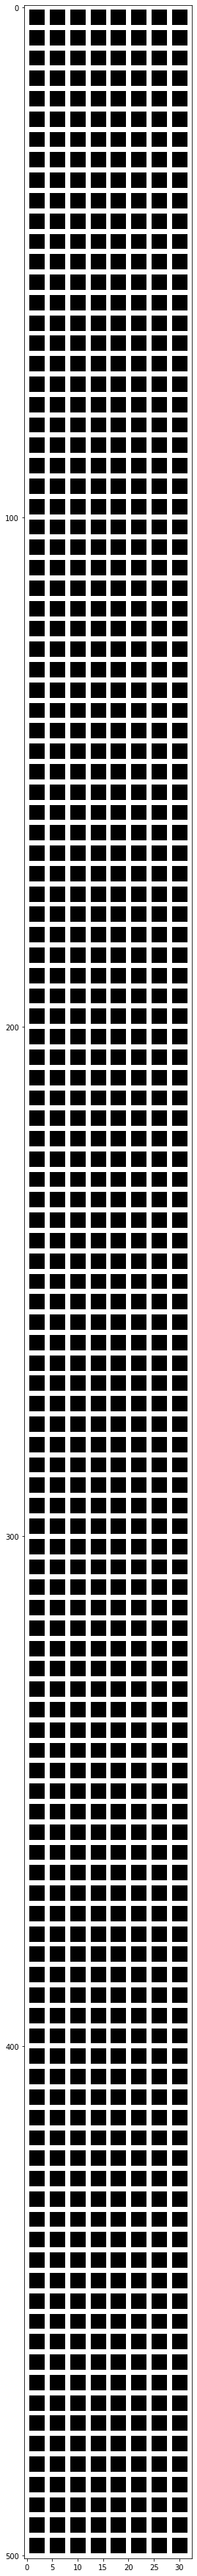

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


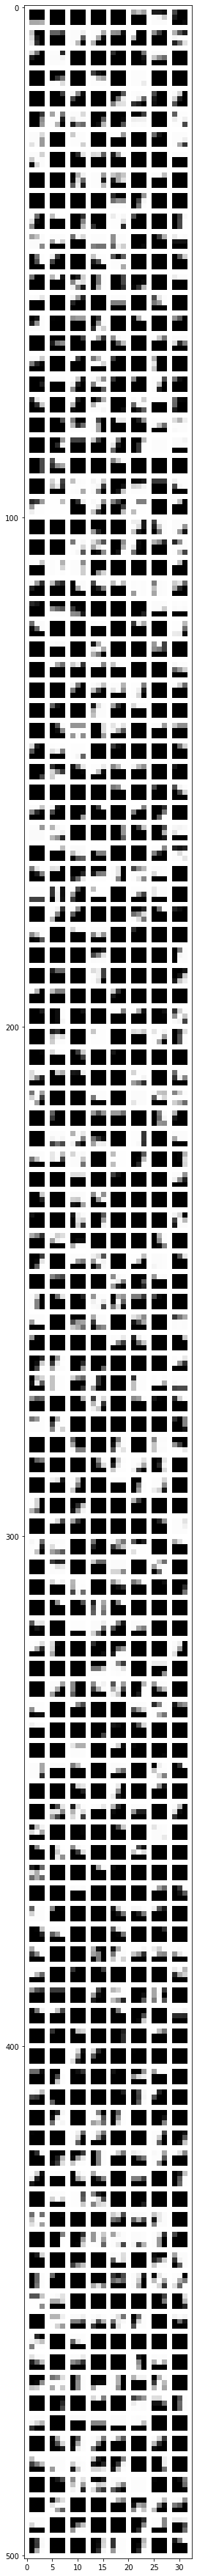

normalized regions:


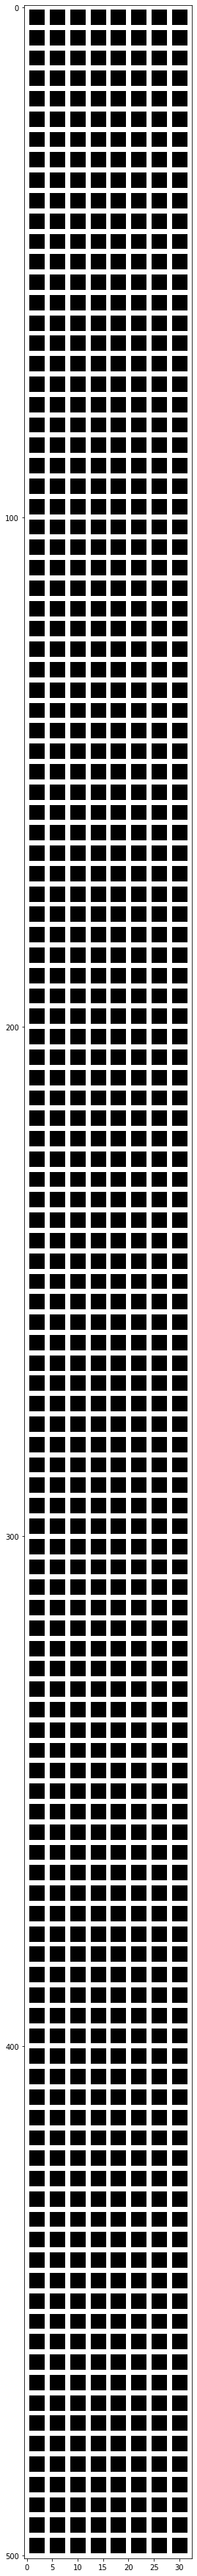

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


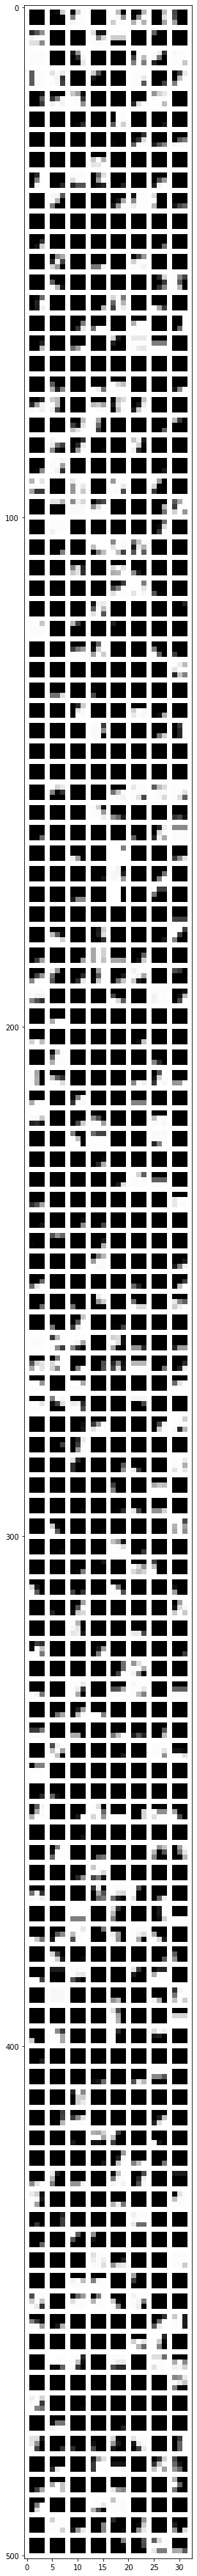

normalized regions:


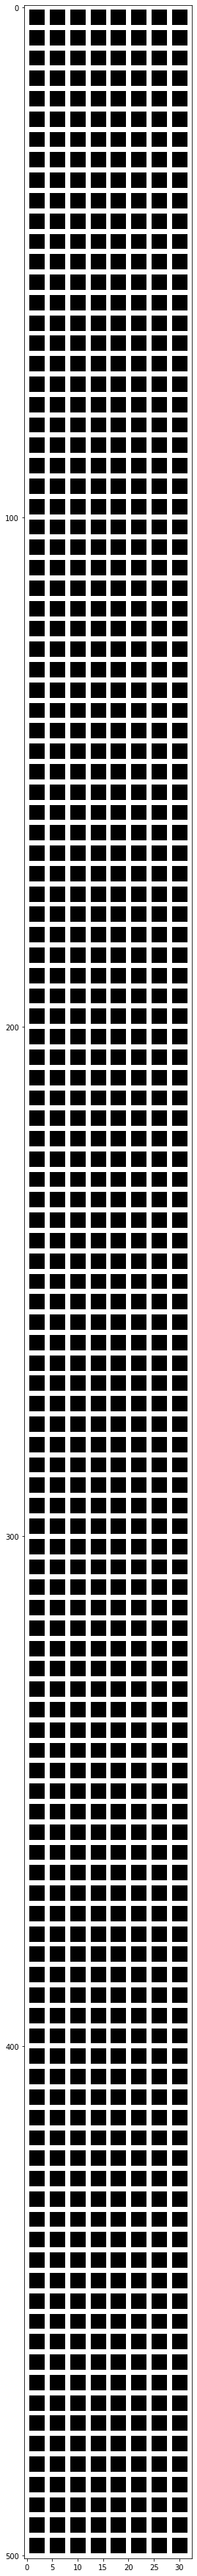

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


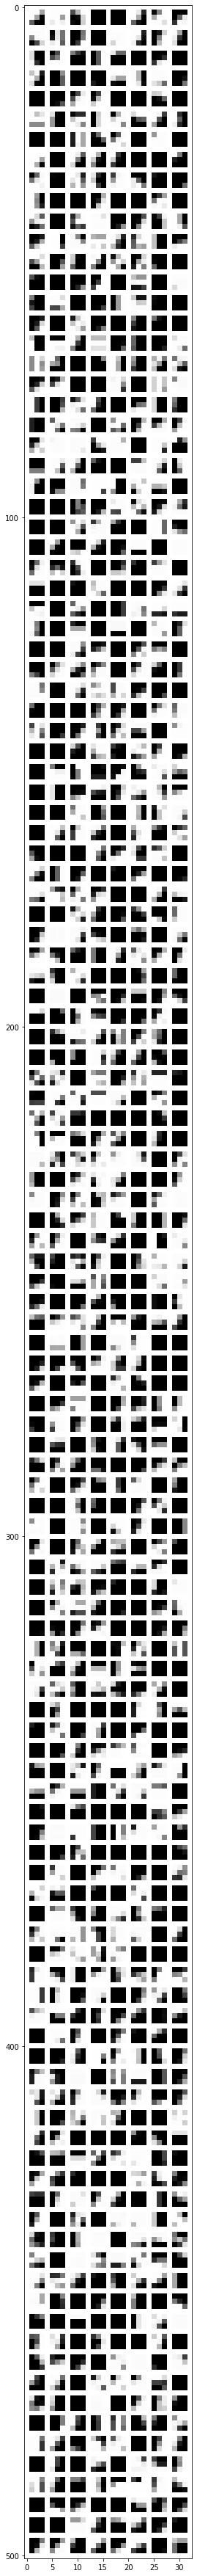

normalized regions:


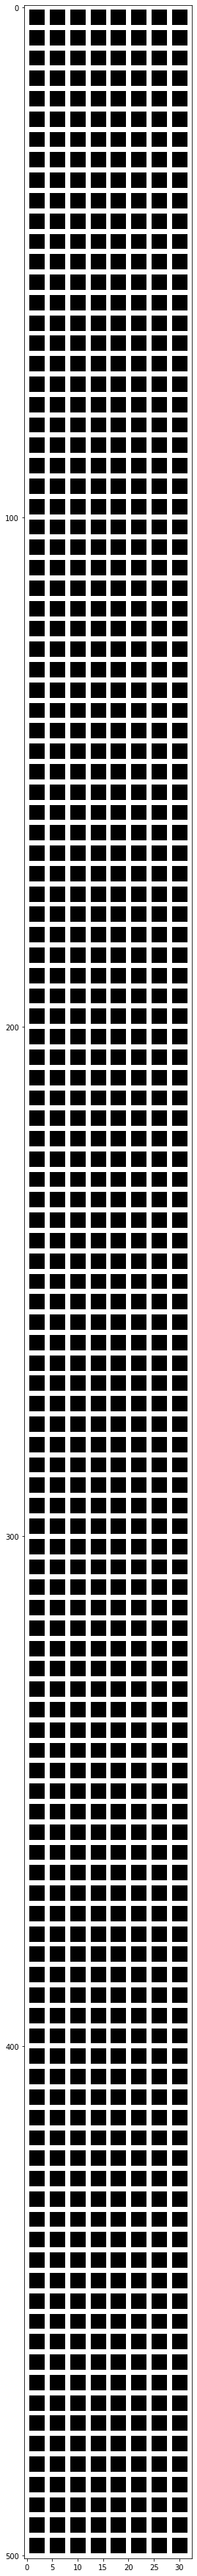

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


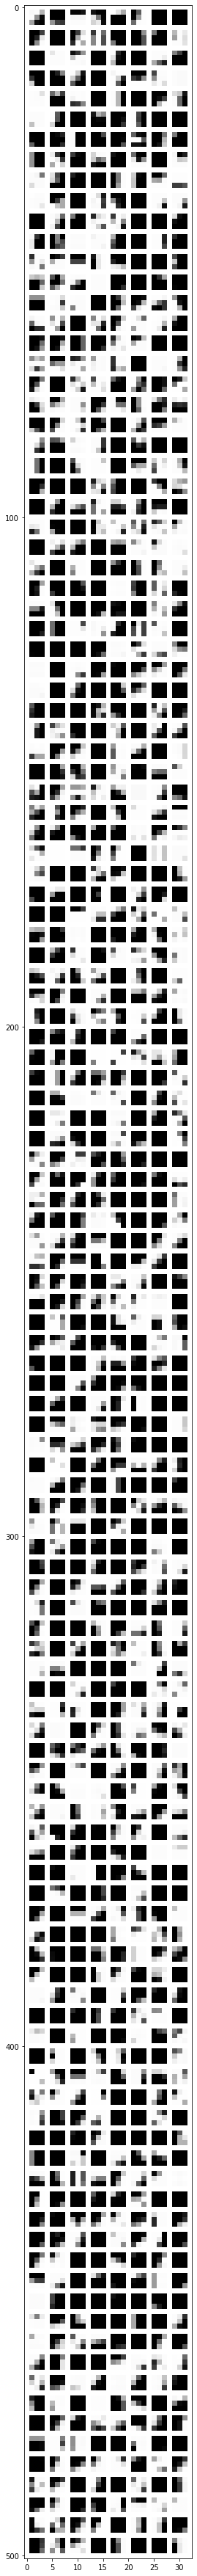

normalized regions:


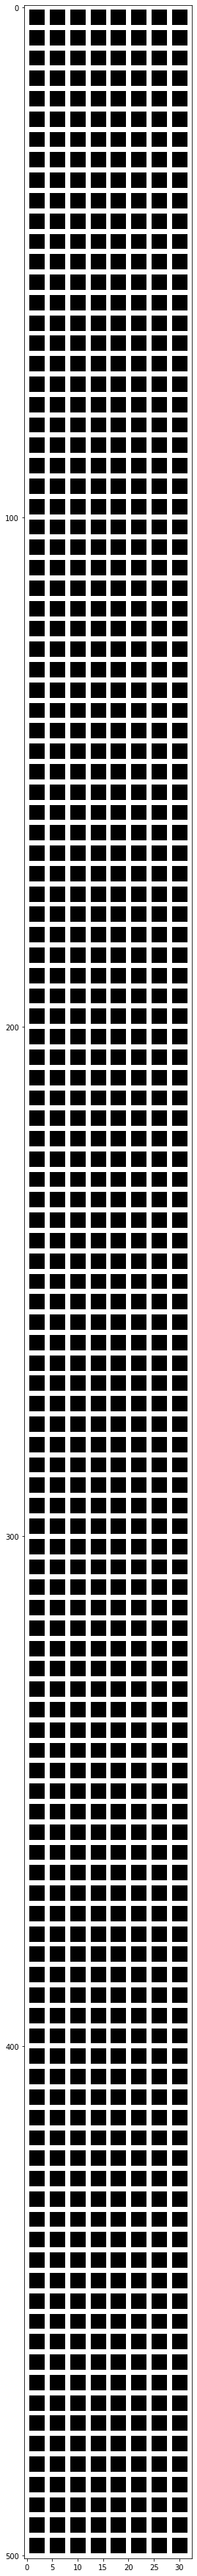

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


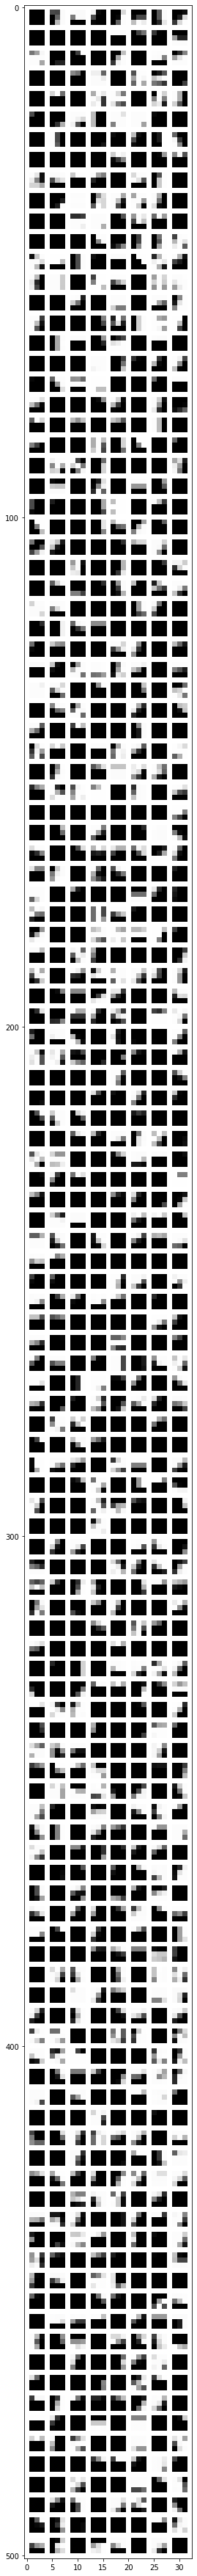

normalized regions:


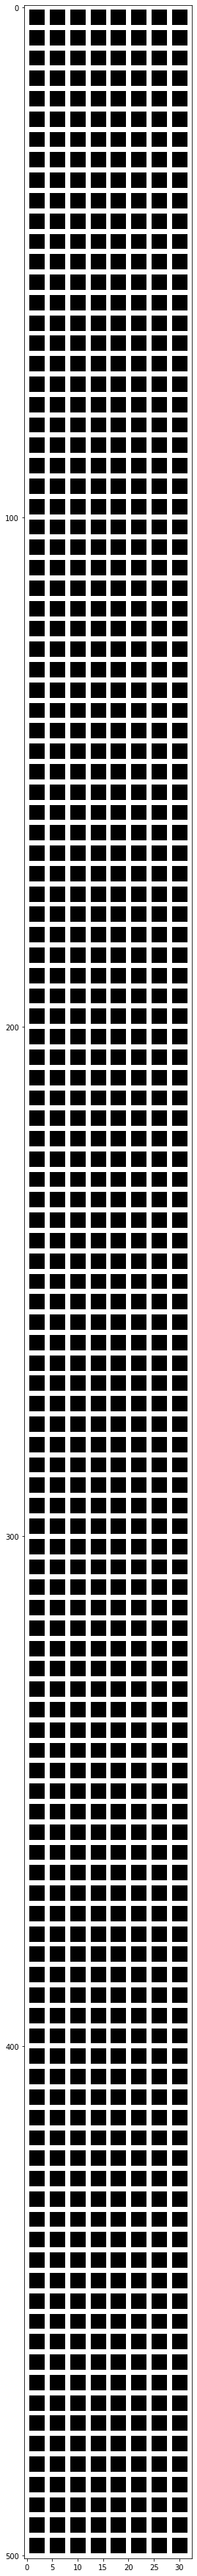

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


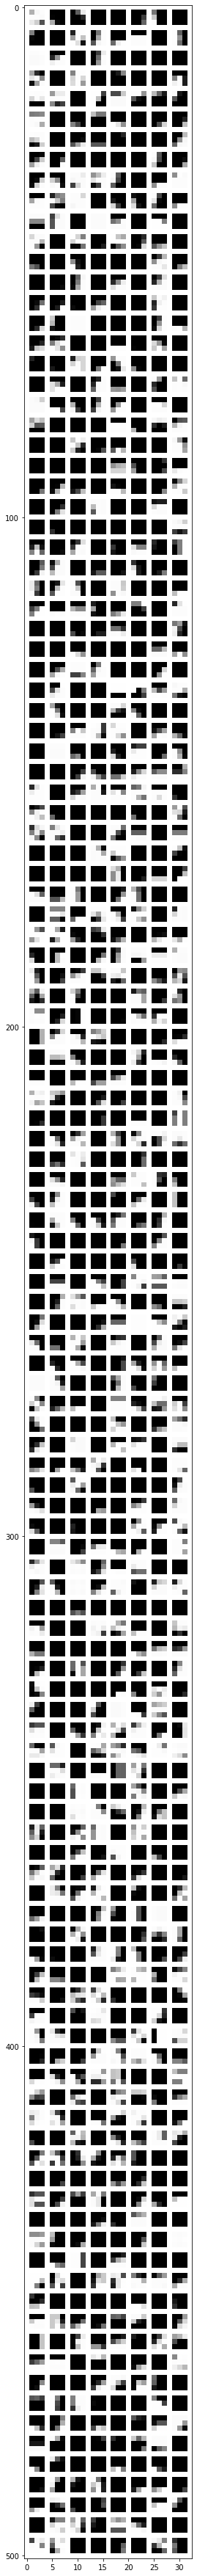

normalized regions:


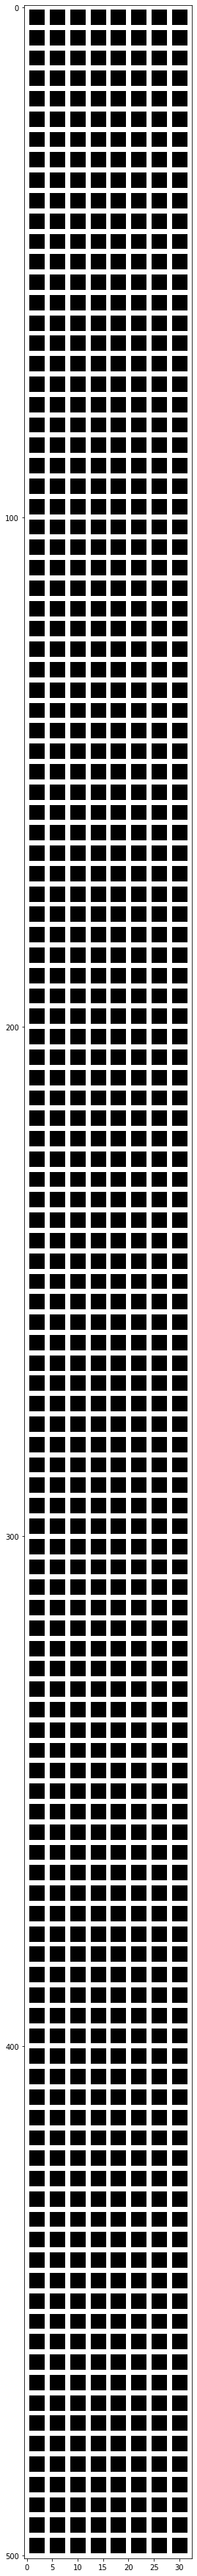

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


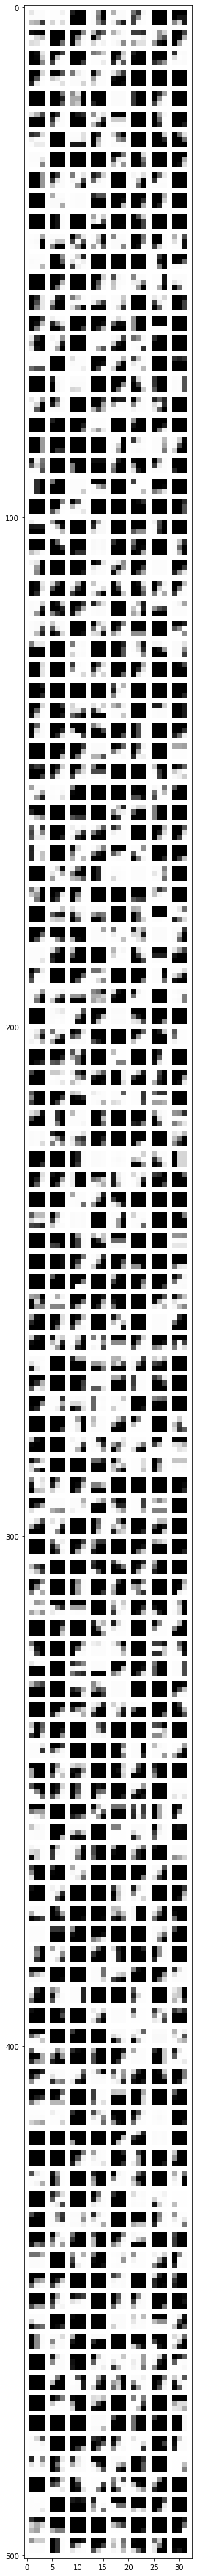

normalized regions:


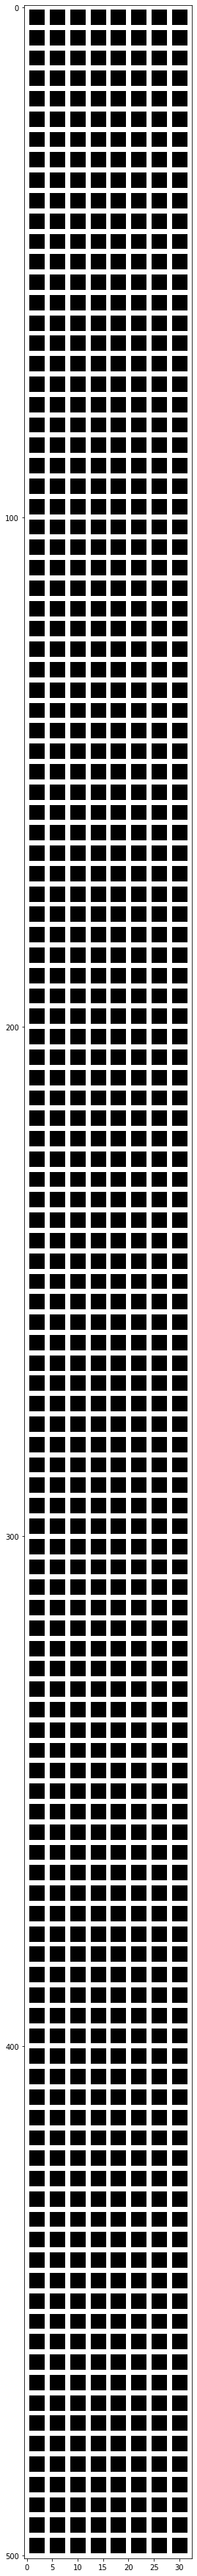

In [27]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary
activations_normalized = activation_layer1_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

In [28]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary
activations_normalized = activation_layer2_binary_normalized

selected_regions, activation_values, activation_values_normalized = get_regions_interest(regions, activations, activations_normalized, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

# Draft

## Test region's score:

In [0]:
from numpy import linalg as LA

In [0]:
def get_activation(name, activation):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

def test_score_region(model, filter_choice):

  dataiter = iter(train_loader)
  images, _ = dataiter.next()

  index = np.random.randint(0,1000)
  image = images[index]
  print('image test number: {} with shape: {}'.format(index, image.shape))
  plt.imshow(image[0], cmap='gray')
  plt.show()

  activation = {}

  for name, m in model.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation))

  out = model(image.unsqueeze(0)) 

  activation_layer1 = activation['layer1'][0]
  activation_layer2 = activation['layer2'][0]

  print('prediction:{}'.format(out.data.numpy().argmax()))       

  filter = filter_choice
  act_max_layer1 = activation_layer1[filter].max()
  print('value activation max for filte {} :{}'.format(filter, act_max_layer1))

  ind_x = int((np.where(activation_layer1[filter] == act_max_layer1)[0])[0]) 
  ind_y = int((np.where(activation_layer1[filter] == act_max_layer1)[1])[0])

  print('index of max value: x: {}, y: {}'.format(ind_x, ind_y))

  name = 'layer1'
  stride = 2
  padding=1
  filter_size=3
  len_img_h=28
  len_img_w=28
  im = image[0]

  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w, return_all=True)

  print('region extracted: {}'.format(region))
  plt.imshow(region, cmap='gray')
  plt.show()

  random_im = np.uint8(np.random.uniform(0, 255, (28, 28)))/255
  print('random image generated:')
  plt.imshow(random_im, cmap='gray')
  plt.show()

  random_im[begin_col:end_col, begin_raw:end_raw] = region
  plt.imshow(random_im, cmap='gray')
  print('random image generated with region that maximize filter activation:')
  plt.show()

  activation_random_im = {}

  for name, m in model_no_binary.named_modules():
      if type(m) == nn.Conv2d:
          m.register_forward_hook(get_activation(name, activation_random_im))

  random_image = (torch.tensor(random_im.reshape((1,1,28,28))))
  out = model_no_binary(random_image.float())
  activation_layer1_random = activation_random_im['layer1'][0]

  act_max_random = activation_layer1_random[filter].max()

  ind_x_random = int((np.where(activation_layer1_random[filter] == act_max_random)[0])[0]) 
  ind_y_random = int((np.where(activation_layer1_random[filter] == act_max_random)[1])[0])

  activation_value_index_random = activation_layer1_random[filter][ind_x][ind_y]
  activation_value_index = activation_layer1[filter][ind_x][ind_y]

  print('activation max for image: {} with index: x:{}, y:{}'.format(act_max_layer1, ind_x, ind_y))
  print('activation max for random image with region: {} with index: x:{}, y:{}'.format(act_max_random, ind_x_random, ind_y_random))  

  print('activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x, ind_y, activation_value_index))
  print('random activation value for ind_x: {} and ind_y: {} = {}'.format(ind_x_random, ind_y_random, activation_value_index_random))
  
  return region

image test number: 445 with shape: torch.Size([1, 28, 28])


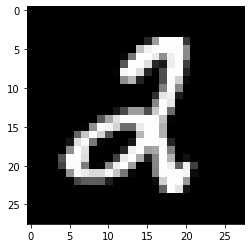

prediction:2
value activation max for filte 9 :0.17210079729557037
index of max value: x: 8, y: 3
region extracted: tensor([[0.0000, 0.0000, 0.0196],
        [0.0000, 0.3922, 0.7765],
        [0.0784, 0.8706, 0.9804]])


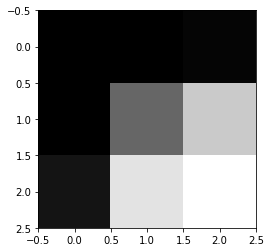

random image generated:


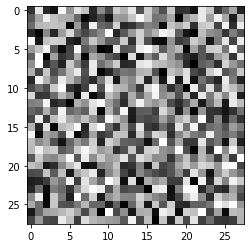

random image generated with region that maximize filter activation:


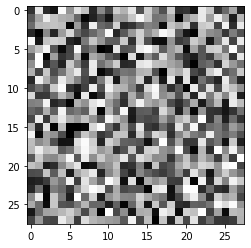

activation max for image: 0.17210079729557037 with index: x:8, y:3
activation max for random image with region: 0.17210079729557037 with index: x:8, y:3
activation value for ind_x: 8 and ind_y: 3 = 0.17210079729557037
random activation value for ind_x: 8 and ind_y: 3 = 0.17210079729557037


In [25]:
model = model_no_binary
filter_choice = 9

region = test_score_region(model, filter_choice)

## filter value:

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m) == nn.Conv2d:
        filters = m.weight.data.clone()
        break

In [46]:
filters.shape

torch.Size([10, 1, 3, 3])

In [47]:
model_no_binary.layer1.bias

Parameter containing:
tensor([ 0.1957,  0.1620, -0.0787, -0.2980,  0.0367, -0.0169,  0.0877,  0.1401,
        -0.1020, -0.2601], requires_grad=True)

In [0]:
filter_0 = filters[0][0]

In [51]:
print(filter_0)

tensor([[-0.0100,  0.2919,  0.1254],
        [ 0.0844,  0.0426,  0.0630],
        [-0.2353, -0.3480, -0.0394]])


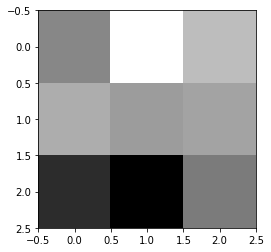

In [49]:
plt.imshow(filter_0, cmap='gray')

Visualization filters learned for layer: layer1


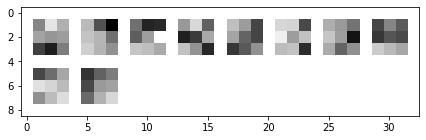

Visualization filters learned for layer: layer2


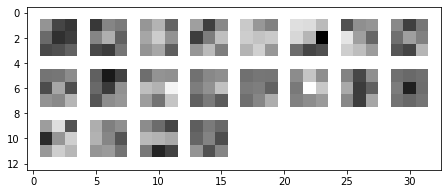

In [50]:
viz_filters(model_no_binary)